# Notebook Styling

In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# LinkedIn Post Engament Analysis: Part 1 - Exploratory Analysis  

### Project Summary
As a LinkedIn content creator, my main question is how do I create posts that drive engagement? This analysis utilizes natural language processing to understand the relationships between what type of words and or hashtags lead to higher engagement. The main assumption is that these relationships can potentially serve as a proxy for what content I should focus on creating to drive engagement.

This notebook will serve as a guide for you to conduct an NLP analysis on your own LinkedIn post data. If you have not used LinkedIn much, then my own LinkedIn post data has been saved as a CSV in this repository for you to use.  

Finally, this notebook is mainly an exploratory analysis where there will be many instances where we can create a function or class to better organize our code. I have made the intentional choice to NOT create functions at this step to specifically mimic the iterative process of an exploratory analysis. In part two we will productize this notebook to send a weekly report to our email-- there we will identify what's important to move forward from the anlysis, refactor our code, and place emphasis on creating scalble and easy maintain code.

### Learning Objectives:
1. Creating an analysis plan for a data science project.
2. Using Naas drivers to pull your LinkedIn post data.
2. Feature engineering to create meaningful variables.
3. Preparing text data for an NLP analysis.
4. Conducting a bag-of-words NLP analysis.

<div> <img src='notebook_images/linkedin_mobile.png' width='500'/> </div>
Photo by <a href="https://unsplash.com/@rswebsols?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Souvik Banerjee</a> on <a href="https://unsplash.com/s/photos/linkedin?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

# Analysis Plan  
Before even coding, it is highly encouraged to create your own analysis plan to guide your work. This is key for keeping you focused on a final deliverable and thinking critically of what steps you need to engage in for a great analysis. This takes practice, and you will get better as you create more projects, but please feel free to use the below example as an outline.

### Data Acquisition  
Naas has special tools to "supercharge" your jupyter notebooks via their drivers. For this analysis we will be using [Naas's LinkedIn post data driver](https://docs.naas.ai/drivers/linkedin#post-data) which will provide the following:  
- POST_URN: Unique identifier for a post.
- POST_URL: Post url
- TITLE: Post text before first break
- TEXT: Entire post text
- TIME_DELTA: Time since post publication
- DATE_APPROX: Date post was made
- LIKES: Numbers of likes
- DIRECT_COMMENTS: Numbers of comments, excluding comment replies
- COMMENTS: Numbers of comments, including comment replies
- VIEWS: Numbers of views
- LIKES: Numbers of likes
- LIKES_LIKE: Numbers of likes type "like"
- LIKES_PRAISE: Numbers of likes type "praise"
- LIKES_INTEREST: Numbers of likes type "interest"
- LIKES_APPRECIATION: Numbers of likes type "appreciation"
- LIKES_EMPATHY: Numbers of likes type "empathy"
- LIKES_MAYBE: Numbers of likes type "maybe"

### Data Preparation  
Just having the data is not enough, some of the most impactful work you can do as a data professional is feature engineering. In other words, what are some creative ways you can transform the data to gain meaningful insights.

**Outcome Variable**  
We have multiple potential outcome variables we can use, thus we will utilize our domain expertise as a content creator and some exploratory analysis to confirm both raw variables and feature engineered variables. Outcome variables include the following:
- VIEWS: This metric informs us of the number of "impressions" (i.e. the "reach") a particular post had. This can be a great proxy for determining if there are any certain post features that the LinkedIn algorithm may not like.  
- LIKES: This metric informs us that a user has both seen a post and decided to take an additional action to engage in a post. One can also argue that other forms of likes (e.g. "LIKES_PRAISE") require an additional action, and thus are more engaged, but for simplicity we will only focus on LIKES.  
- DIRECT_COMMENTS: This metric is the highest form of engagement as it requires the most actions from a user. Again, as a way to simply our analysis, this analysis will only focus on direct comments rather than all comments as it would be hard to understand whether comment replies are conversations among my audience, or me replying to all of the direct comments (this is my comment strategy, but tailor this to your own approach).  
- Engagement Score (feature engineered): This score will combine VIEWS, LIKES, DIRECT_COMMENTS into a composite score that represent overall engagement.

**Data Features**  
The only raw data feature available is TEXT, but with some regex and NLP tools, we can extract many meaningful data features for our analysis. Data features include the following:  
- Number of Words
- Number of Characters
- Number of Emojis
- Hashtags
- Number of Hashtags
- Is Link Present (bool)
- Theme Campaign (categorical)
- CountVectorized Text

**Preprocess Text Data via NLP:**
1. Select text data.
2. Extract Number of Words, Number of Characters, Number of Emojis, Number of Hashtags, Is Link Present, and Theme Campaign.
3. Standardize text (e.g. all lower case, etc.).
4. Split text data into content and hashtags dataframes.  
    a. content dataframe  
        5a. Tokenize text data
        6a. Remove stop words
        7a. Lemmatization
        8a. TF-IDF Vectorizer  
    b. hashtag dataframe  
        8b. TF-IDF Vectorizer  

*Why are we only removing stop words and lemmatizing the content dataframe?*  
One has to be mindful of the context of the text data. In large documents, such as 100+ posts in this analysis, there are going to be numerous tokens-- thus, we want a way to reduce the complexity of the data and dimensionality of the dataframe. This is not the case for hashtags, as the number of hashtags are substantially smaller than words within a post's content. In addition, the difference between #datascientists and #datascientist are much more meaningful when comparing hashtags as each respectively reach different communities on LinkedIn.

*Why are we using TF-IDF Vectorizer instead of Count Vectorizer?*  
Count Vectorizer essentially takes a corpus (i.e. set of documents, like LinkedIn posts, with text) and turns each word into a column where each row represents a document and number of words present. Given that my LinkedIn posts mainly discuss data science topics, there are going to be a lot of words that repeat in each post (e.g. "data", "ml", etc.). TF-IDF Vectorizer allows me to pick up on the "relevancy" of certain words, where TF-IDF is the product of term frequency multiplied by the inverse document frequency. The higher the score, the more relevant a particular word is in a particular document. Check out [TF-IDF's Wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) to learn more, in addition the below tables provide an example comparing the two approaches.  

--  
**Count Vectorizer**  

| Text                       | and | blue | cat | dog | green | ran | the |
| -------------------------- | --- | ---- | --- | --- | ----- | --- | --- |
| The green dog ran and ran. | 1   | 0    | 0   | 1   | 1     | 2   | 1   |
| The blue cat ran.          | 0   | 1    | 1   | 0   | 0     | 1   | 1   |  

--  
**TF-IDF Vectorizer**  

| Text                       | and  | blue | cat  | dog  | green | ran  | the  |
| -------------------------- | ---- | ---- | ---- | ---- | ----- | ---- | ---- |
| The green dog ran and ran. | 0.43 | 0.00 | 0.00 | 0.43 | 0.43  | 0.61 | 0.30 |
| The blue cat ran.          | 0.00 | 0.58 | 0.58 | 0.00 | 0.00  | 0.41 | 0.41 |  

--
  
### Analysis
For this analysis I am aiming to answer the following questions:
1. What are my overall summary statistics for my LinkedIn posts?
    - Most viewed, commented, and liked posts.
    - Median post view, comment, and like count.
    - Rolling weekly average post view, comment, and like count (visualization).
2. Are higher views correlated higher with comments or like?
    - Create a correlation table between views, comment count, and view count.
3. Do links present in a post result in lower post views?
    - T-test comparing outcome variables among posts with links and without links (may need to adjust if distribution is not normal).
4. Did my weekday theme campaign (e.g. "#MondayMotivation", "#TuesdayTours", etc.) result in higher engagement?  
    - T-test comparing posts that are part of the theme campaign and not part of the campaign, comparing outcome variables.
    - ANOVA to determine if any weekday themes performed better, comparing outcome variables.  
5. What are the main drivers of engagement on posts:
    - Fit multiple random forest models where the independent variables are the outcome variables and the dependent variables are Number of Words, Number of Characters, Number of Emojis, Number of Paragraphs, and Number of Hashtags.
    - Extract feature importance.
    - Plot most important feature to outcome variable
6. Are there any specific hashtags I should be using more to driving engagement?
    - Fit multiple random forest models where the independent variables are the outcome variables and the dependent variables the TF-IDF Vectorizer content text.
    - Extract feature importance.
    - For the most important feature, assign status of whether or not feature is present for each post.
    - Summary stats comparing posts with and without most important feature
    - Plot the distributions of the outcome variables (normalizing values only for plots).
    - Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses for the feature importance.
7. Are there any specific content topics I should be posting more to drive engagement?
    - Fit multiple random forest models where the independent variables are the outcome variables and the dependent variables the TF-IDF Vectorizer content text.
    - Extract feature importance.
    - For the most important feature, assign status of whether or not feature is present for each post.
    - Summary stats comparing posts with and without most important feature
    - Plot the distributions of the outcome variables (normalizing values only for plots).
    - Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses for the feature importance.
    
***One key distinction I want to note with this analysis is that I am uncovering relationships, but I am NOT showing causality except for the few instances I am conducting statistical tests. Even if a statistical test rejects a null hypothesis, since this is only my data and is a small population, one should not believe results to be fully generalizable.***

# Environment Setup

### Install Packages

In [ ]:
# http://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/#pip-vs.-conda
import sys
!{sys.executable} -m pip install emoji
!{sys.executable} -m pip install spacy
!python -m spacy download en_core_web_sm
!{sys.executable} -m pip install seaborn

# # note: downloading tableone briefly caused dependency issue with ipykernel (used for running notebooks)
# # and pysqlite3 via anaconda, which casues a warning message to pop up due a deprecated function. This
# # doesn't stop the anlysis, but it is annoying to have it pop up after every code cell. You can resolve
# # this by 1) reinstalling ipykernel and pysqlite3 to the version that satisfies naas notebooks,
# # or 2) suppressing warnings in the notebook.
!{sys.executable} -m pip install tableone

### Import Packages

In [3]:
import emoji
from IPython.display import display
import naas
from naas_drivers import linkedin
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import spacy
from tableone import TableOne

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### LinkedIn Profile Information

In [5]:
# LinkedIn Credentials
# Doc for credentials: https://www.notion.so/LinkedIn-driver-Get-your-cookies-d20a8e7e508e42af8a5b52e33f3dba75
# Doc for secrets: https://docs.naas.ai/features/secret
LI_AT = naas.secret.get(name='COOKIE_LI_AT')
JSESSIONID = naas.secret.get(name='COOKIE_JSESSIONID')

# LinkedIn Profile
PROFILE_URL = 'https://www.linkedin.com/in/mafreeman2/'

# Data Acquisition

In [6]:
# Naas doc for LinkedIn post stats: https://github.com/jupyter-naas/awesome-notebooks/blob/master/LinkedIn/LinkedIn_Get_posts_stats_from_profile.ipynb
linkedin_posts_new_df = linkedin.connect(LI_AT, JSESSIONID).profile.get_posts_stats(PROFILE_URL)

In [7]:
# check for existing linkedin data
# if existing data exists, then union data, remove duplicates, and save data
# if data does not exist, then only save data
# import back in saved data 
my_file = Path('linkedin_data/linkedin_posts_df.csv')
if my_file.is_file():
    linkedin_posts_existing_df = pd.read_csv('linkedin_data/linkedin_posts_df.csv')
    
    linkedin_posts_df = pd \
        .concat([linkedin_posts_new_df, linkedin_posts_existing_df]) \
        .drop_duplicates(subset=['TEXT'], keep='first')
    
    linkedin_posts_df.to_csv('linkedin_data/linkedin_posts_df.csv', index=False)
    linkedin_posts_df = pd.read_csv('linkedin_data/linkedin_posts_df.csv')
else:
    linkedin_posts_new_df.to_csv('linkedin_data/linkedin_posts_df.csv', index=False)
    linkedin_posts_df = pd.read_csv('linkedin_data/linkedin_posts_df.csv')

In [8]:
linkedin_posts_df.head(3)

,POST_URN,POST_URL,TITLE,TEXT,TIME_DELTA,DATE_APPROX,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,LIKES_LIKE,LIKES_PRAISE,LIKES_APPRECIATION,LIKES_EMPATHY,LIKES_MAYBE,LIKES_INTEREST
0,6821831282234933248,https://www.linkedin.com/posts/mafreeman2_onth...,🎁 Feedback is a gift! I want to share an exper...,🎁 Feedback is a gift! I want to share an exper...,2d,2021-07-17,22,2,2,966.0,19.0,1.0,1.0,1.0,0.0,0.0
1,6821466388474032128,https://www.linkedin.com/posts/mafreeman2_data...,"We all make mistakes, even when you are a data...","We all make mistakes, even when you are a data...",3d,2021-07-16,39,4,4,1355.0,33.0,5.0,1.0,0.0,0.0,0.0
2,6821098945536774144,https://www.linkedin.com/posts/mafreeman2_wow-...,😮 WOW WOW WOW! A paper that I'm a co-author on...,😮 WOW WOW WOW! A paper that I'm a co-author on...,4d,2021-07-15,223,19,35,10786.0,163.0,47.0,0.0,12.0,1.0,0.0


### Confirming Data Types
One of the first checks I do on my data is to confirm that I indeed have the correct data types, as this can lead to errors or code not running in later steps.

In [148]:
for col in linkedin_posts_df.columns:
    col_type = type(linkedin_posts_df[col][0])
    print(col, ': ', col_type)

POST_URN :  <class 'str'>
POST_URL :  <class 'str'>
TITLE :  <class 'str'>
TEXT :  <class 'str'>
TIME_DELTA :  <class 'str'>
DATE_APPROX :  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
LIKES :  <class 'numpy.int64'>
DIRECT_COMMENTS :  <class 'numpy.int64'>
COMMENTS :  <class 'numpy.int64'>
VIEWS :  <class 'numpy.int64'>
LIKES_LIKE :  <class 'numpy.int64'>
LIKES_PRAISE :  <class 'numpy.int64'>
LIKES_APPRECIATION :  <class 'numpy.int64'>
LIKES_EMPATHY :  <class 'numpy.int64'>
LIKES_MAYBE :  <class 'numpy.int64'>
LIKES_INTEREST :  <class 'numpy.int64'>


I will need to change DATE_APPROX to a datetime and all float64s into int64s.

In [149]:
# str to datetime
linkedin_posts_df['DATE_APPROX'] = pd.to_datetime(linkedin_posts_df['DATE_APPROX'])

# float to int
float_cols = ['VIEWS', 'LIKES_LIKE', 'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE', 'LIKES_INTEREST']
linkedin_posts_df[float_cols] = linkedin_posts_df[float_cols].astype(int)

# also found that some rows of POST_URN are int while others are str
# changing all POST_URN to str
linkedin_posts_df['POST_URN'] = linkedin_posts_df['POST_URN'].astype(str)

Now that I am happy with the data types and the acquired data, I can move onto data preperation and cleaning.

In [150]:
posts_cleaning_df = linkedin_posts_df.copy()

# Data Preparation - Outcome Variables  
1. Check summary stats and distributions.  
2. Check for NULLs and or other strange values.  
3. Feature engineer outcome variable for analysis.

In [151]:
# set the variables I want to review as a list
outcome_cols = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS']

### 1. Check summary stats and distributions.
When preparing data, a necessary early step for continous outcome variables is to understand their summary statistics and distribution, as this will frame how you handle future analyses.

,LIKES,DIRECT_COMMENTS,VIEWS
count,103.000000,103.000000,103.000000
mean,67.398058,6.339806,5160.456311
std,99.996308,6.017219,7411.320952
min,0.000000,0.000000,0.000000
25%,24.000000,2.500000,1340.500000
50%,40.000000,5.000000,3080.000000
75%,67.500000,9.000000,6130.500000
max,721.000000,40.000000,53045.000000


array([[<AxesSubplot:title={'center':'LIKES'}>,
        <AxesSubplot:title={'center':'DIRECT_COMMENTS'}>,
        <AxesSubplot:title={'center':'VIEWS'}>]], dtype=object)

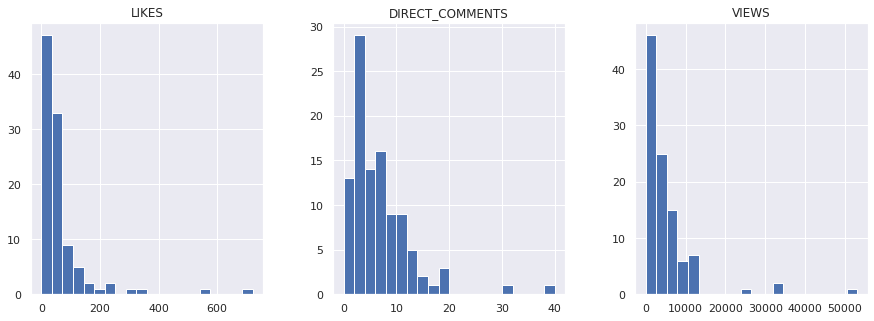

In [152]:
outcome_cols = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS']

display(posts_cleaning_df[outcome_cols].describe(include = 'all'))
posts_cleaning_df[outcome_cols].hist(
    bins = 20,
    layout = (1,3),
    figsize = (15,5)
    )

### 2. Check for NULLs and or other strange values.  
Sometimes incorrect values are very obvious, but many times removing or augmenting data requires one to utilize domain knowledge to identify unexpected values. In this case, there were thankfully no NULL values, but it seems that the Naas drivers did bring in an unexpected zeroes into my data. Furthermore, I validate my assumptions by both reviewing the raw data, and if possible reviewing the source of the data (in this case reviewing the actual LinkedIn post itself).

In [153]:
for col in outcome_cols:
    num_null = posts_cleaning_df[col].isin([0]).sum()
    print(f'{col}: {num_null} zeroes present')

LIKES: 5 zeroes present
DIRECT_COMMENTS: 6 zeroes present
VIEWS: 5 zeroes present


Having zero views for a post is quite strange. Upon further review, it seems like LinkedIn poll and share posts are an edge case that are not picked up ([filed a GitHub issue]('https://github.com/jupyter-naas/drivers/issues/135')). I can easily fill in the data, but to account for future issues I will just remove the data for simplicity.

In [154]:
posts_cleaning_df[posts_cleaning_df['VIEWS'] == 0]

,POST_URN,POST_URL,TITLE,TEXT,TIME_DELTA,DATE_APPROX,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,LIKES_LIKE,LIKES_PRAISE,LIKES_APPRECIATION,LIKES_EMPATHY,LIKES_MAYBE,LIKES_INTEREST
7,6818639611699585024,https://www.linkedin.com/posts/mafreeman2_futu...,💭 Have you thought about what return to work m...,💭 Have you thought about what return to work m...,1w,2021-07-12,0,0,0,0,0,0,0,0,0,0
26,6811279002506948609,https://www.linkedin.com/posts/activity-681127...,Don't let people reject you in interviews by t...,Don't let people reject you in interviews by t...,1mo,2021-06-19,0,0,0,0,0,0,0,0,0,0
47,6802413246818209792,https://www.linkedin.com/posts/mafreeman2_tues...,"LinkedIn, I need your feedback! Would you pref...","LinkedIn, I need your feedback! Would you pref...",1mo,2021-06-19,0,0,0,0,0,0,0,0,0,0
56,6798598298178609152,https://www.linkedin.com/posts/activity-679859...,How to become a #DataScience boss in 5 simple ...,How to become a #DataScience boss in 5 simple ...,2mo,2021-05-20,0,0,0,0,0,0,0,0,0,0
90,6773601429681786881,https://www.linkedin.com/posts/activity-677360...,I still remember my first enterprise sale. I w...,I still remember my first enterprise sale. I w...,4mo,2021-03-21,0,0,0,0,0,0,0,0,0,0


In [155]:
# pulling post links to manually review
posts_cleaning_df[posts_cleaning_df['VIEWS'] == 0]['POST_URL']

7     https://www.linkedin.com/posts/mafreeman2_futu...
26    https://www.linkedin.com/posts/activity-681127...
47    https://www.linkedin.com/posts/mafreeman2_tues...
56    https://www.linkedin.com/posts/activity-679859...
90    https://www.linkedin.com/posts/activity-677360...
Name: POST_URL, dtype: object

In [156]:
# remove posts with 0 views
posts_cleaning_df = posts_cleaning_df[posts_cleaning_df['VIEWS'] != 0] \
    .copy() \
    .reset_index(drop=True)

### 3. Feature engineer outcome variable for analysis:
### Engagement Score
The Engagement Score is the product of comment count times likes count, divided by the total views. The reason why I chose not to sum comment and like counts is because that would imply that both would hold equal value. Using my domain knowledge of utilizing LinkedIn, I am aware that comments are extremely important for gaining reach on post, in addition I noted earlier that comments are the highest level of engagement on a post. Thus, I am having the comment count modify the post count to provide it stronger meaning. In addition, I am dividing by number of views to account for a higher score not being biased towards posts with higher reach-- again, I am trying to find a proxy for engagement, not reach. Furthermore, this equation means that a post with many likes but zero comments and vice versa will have an engagement score of zero (this is intentional).

Finally, it is important to note that this score is a major assumption and would need to be validated. For the purpose of this analysis I will assume that the score is correctly picking up engagement, with my confidence in the score stemming from my domain expertise with being a LinkedIn content creator. Furthermore, the distribution of the engagement score being similar to views, comments, and likes is promising.

In [157]:
# engagement score
posts_cleaning_df['ENGAGEMENT_SCORE'] = round((posts_cleaning_df['DIRECT_COMMENTS']*posts_cleaning_df['LIKES'])/posts_cleaning_df['VIEWS'], 2)
outcome_cols = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']

,LIKES,DIRECT_COMMENTS,VIEWS,ENGAGEMENT_SCORE
0,22,2,966,0.05
1,39,4,1355,0.12
2,223,19,10786,0.39
3,49,7,4365,0.08
4,37,6,1698,0.13
5,24,6,2298,0.06
6,48,7,2807,0.12
7,81,10,6110,0.13
8,86,14,8294,0.15
9,53,9,6169,0.08


,LIKES,DIRECT_COMMENTS,VIEWS,ENGAGEMENT_SCORE
count,98.000000,98.000000,98.000000,98.000000
mean,70.836735,6.663265,5423.744898,0.103367
std,101.334060,5.991306,7504.416699,0.108931
min,4.000000,0.000000,154.000000,0.000000
25%,26.250000,3.000000,1557.750000,0.040000
50%,42.500000,5.000000,3192.500000,0.080000
75%,69.750000,9.000000,6164.500000,0.127500
max,721.000000,40.000000,53045.000000,0.540000


array([[<AxesSubplot:title={'center':'LIKES'}>,
        <AxesSubplot:title={'center':'DIRECT_COMMENTS'}>,
        <AxesSubplot:title={'center':'VIEWS'}>,
        <AxesSubplot:title={'center':'ENGAGEMENT_SCORE'}>]], dtype=object)

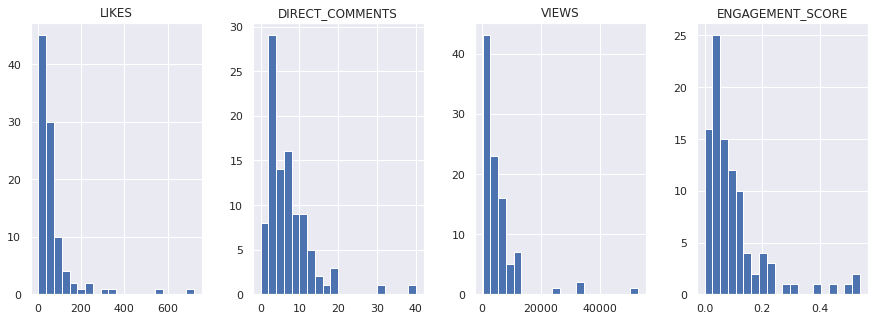

In [158]:
display(posts_cleaning_df[outcome_cols].head(10))
display(posts_cleaning_df[outcome_cols].describe())
posts_cleaning_df[outcome_cols].hist(
    bins = 20,
    layout = (1,4),
    figsize = (15,5)
    )

# Data Preparation - Data Features
1. Select text data.
2. Extract Number of Words, Number of Characters, Number of Emojis, Number of Hashtags, Is Link Present, and Theme Campaign.
3. Standardize text (e.g. all lower case, etc.).
4. Split text data into content and hashtags dataframes.  
    a. content dataframe  
        5a. Tokenize text data
        6a. Remove stop words
        7a. Lemmatization
        8a. TF-IDF Vectorizer  
    b. hashtag dataframe  
        8b. TF-IDF Vectorizer  

### 1. Select Text Data  
Since I will be modifying text data quite a bit for the NLP bag of words anlysis, I want to ensure that I keep a copy of the raw text for reference.

In [159]:
posts_cleaning_df['RAW_TEXT'] = posts_cleaning_df['TEXT'] 

### 2. Extract Data Features  
- Number of Words
- Number of Characters
- Number of Emojis
- Number of Hashtags
- Is Link Present
- Theme Campaign  

One of the most fun aspects of working with unstructured text data are the number of unique data features you can extract from this rich data. This step is going to be determined heavily by your domain knowledge and the exact questions you are trying to answer in your analysis plan. For example, "Theme Campaign" is very specific to my own LinkedIn posts where I used specific hashtags for a theme campaign I tried out for my posts.  

***Note:***  
I also want to specifically call out the use of apply with lambda functions in this step. One of the main benefits of using pandas for our dataframes is that our data is "vectorized" in which we can apply a function to an entire column rather each individual value. Thus, we can avoid a computationaly expensive for loop on text data-- which is not an issue for our currrent ~100 row dataset, but can potentially pose a problem as our data grows.

In [160]:
# number of words
posts_cleaning_df['WORD_COUNT'] = posts_cleaning_df['RAW_TEXT'].apply(lambda x: len(x.split()))

In [161]:
# number of characters
posts_cleaning_df['CHAR_COUNT'] = posts_cleaning_df['RAW_TEXT'].apply(lambda x: len(x))

In [162]:
# number of emojis
# doc for extracting emojis: https://github.com/carpedm20/emoji
# utilize sets to find the intersection between the list of all emojis and the list of a post's characters
emojis_list = list(emoji.UNICODE_EMOJI['en'].keys())
posts_cleaning_df['EMOJI_COUNT'] = posts_cleaning_df['RAW_TEXT'].apply(
    lambda x: len(
        set(emoji.UNICODE_EMOJI['en'].keys()) & set(list(x))
    )
)

In [163]:
# number of hashtags
posts_cleaning_df['HASHTAG_COUNT'] = posts_cleaning_df['RAW_TEXT'].str.count('#')

***Note:***  
This will be our first time using "regex" in our analysis, which is an awesome language to identify specifc patterns in text data. In pandas and other formats, regex is often denoted with <code>r'your regex code here'</code>. Regex is one of the most useful tools when preparing your data for NLP, and I highly recommend using this regex debugger to help you create the regex code that best fits your use cases!

https://regex101.com/

In [164]:
# determine if link is present
posts_cleaning_df['LINK_BOOL'] = posts_cleaning_df['RAW_TEXT'].str.contains(r'https|www|\.com|\.org|\.ai|\.io|\.co|\.gov|\.edu')

**Further Context On Theme Campaign:**  
I ran a ~1 month social media campaign starting on 2021-06-19 where I wrote about a specific theme for every weekday with an accompanying hashtag. This was surprisingly a lot of work with pros and cons, and I don't have a great sense of how well this campaign performed.  

The five themes were the following:
- #MondayMotivation
- #TuesdayTours
- #WednesdayWork
- #ThursdayThoughts
- #FridayFinds  

More information can be found on my LinkedIn post introducing the themes:  
https://www.linkedin.com/posts/mafreeman2_mondaymotivation-tuesdaytips-wednesdaywork-activity-6800491652101349376-2Bm4

In [165]:
# determine if part of campaign theme
posts_cleaning_df['THEME'] = 'no_theme'
theme_dict = {
    'Monday':'monday_motivation',
    'Tuesday': 'tuesday_tours',
    'Wednesday': 'wednesday_work',
    'Thursday': 'thursday_thoughts',
    'Friday': 'friday_finds'
}

for key in theme_dict.keys():
    # 6802628805912616960
    posts_cleaning_df.loc[
        (posts_cleaning_df['RAW_TEXT'].str.contains(key)) &
        (posts_cleaning_df['POST_URN'] >= '6802628805912616960'),
        'THEME'
    ] = theme_dict[key]

In [166]:
# review the new data features we created
data_features = ['RAW_TEXT', 'WORD_COUNT', 'CHAR_COUNT', 'EMOJI_COUNT', 'HASHTAG_COUNT', 'LINK_BOOL', 'THEME']
posts_cleaning_df[data_features].head()

,RAW_TEXT,WORD_COUNT,CHAR_COUNT,EMOJI_COUNT,HASHTAG_COUNT,LINK_BOOL,THEME
0,🎁 Feedback is a gift! I want to share an exper...,203,1235,6,16,False,no_theme
1,"We all make mistakes, even when you are a data...",84,569,0,14,False,no_theme
2,😮 WOW WOW WOW! A paper that I'm a co-author on...,94,556,4,0,False,no_theme
3,👇🏽 Want to stay on top of data science trends ...,156,1184,8,17,False,no_theme
4,Made some great progress on my tutorial on how...,152,975,0,16,False,no_theme


### 3. Standardize Text Data  
An important step to make the NLP tekenizing process as easy as possible is to standardize the text. In most cases I will make text lower case, remove contractions (e.g. "'s"), remove symbols (except #), and remove extra whitespace. Please keep in mind that this is determined by your NLP use case, so make necessary adjustments based on your domain knowledge.

In [167]:
# lower case, remove contractions (e.g. "'s"), remove symbols (except #), remove extra whitespace
posts_cleaning_df['TEXT'] = posts_cleaning_df['TEXT'].str.lower()
posts_cleaning_df['TEXT'] = posts_cleaning_df['TEXT'].str.replace(r'\w{1}\'\w{1}\b', ' ', regex=True)
posts_cleaning_df['TEXT'] = posts_cleaning_df['TEXT'].str.replace(r'[-!$%^&*()_+|~=`{}\[\]:\";\'<>?,.\/]', ' ', regex=True)
# posts_cleaning_df['TEXT'] = posts_cleaning_df['TEXT'].str.replace(r'\n t ', ' ', regex=True)
posts_cleaning_df['TEXT'] = posts_cleaning_df['TEXT'].str.replace(r'\s{2,}', ' ', regex=True)
posts_cleaning_df['TEXT'] = posts_cleaning_df['TEXT'].str.strip()

In [168]:
print('RAW TEXT:', '\n', posts_cleaning_df['RAW_TEXT'][0], '\n')
print('STANDARDIZED TEXT:', '\n', posts_cleaning_df['TEXT'][0], '\n')

RAW TEXT: 
 🎁 Feedback is a gift! I want to share an experience that happened yesterday highlighting this....💻 My friend reached out to learn about the data space as he is preparing for a big interview. I spent 30 minutes explaining what's considered "the modern data stack", but the most important conversation happened at the end.🧐 I asked, "Do you have any constructive feedback for me? I want to do more public speaking on the topic of data, and I would love to know what worked and didn't for our conversation."🎤 He informed me that the way I emphasize certain words when I speak was extremely helpful in learning a new topic.🤯 MY MIND WAS BLOWN, as it informed me of a strength that 1) I was completely unaware of, and 2) I can further refine.📈 Asking for feedback may make you feel vulnerable at first, but in the long run it will provide you key insights for long term success. Some feedback is amazing (both positive and constructive), and other feedback can be lacking. Regardless, someone 

### 4. Split Text Data Into Content and Hashtags  
Again, according to my data analysis plan and use case for this NLP analysis I want to seperate the hashtags from the content in my posts. This is important as these two seperate forms of text data will answer different questions.

In [169]:
# hashtag text data
posts_cleaning_df['HASHTAGS'] = posts_cleaning_df['TEXT'].str.findall(r'(#\S*)')
posts_cleaning_df['HASHTAGS'] = posts_cleaning_df['HASHTAGS'].apply(lambda x: ' '.join(x))

In [170]:
# content text data
posts_cleaning_df['CONTENT'] = posts_cleaning_df['TEXT'].str.replace(r'(#\S*)', '', regex=True)

In [171]:
print('RAW TEXT:', '\n', posts_cleaning_df['RAW_TEXT'][0], '\n')
print('STANDARDIZED TEXT:', '\n', posts_cleaning_df['TEXT'][0], '\n')
print('CONTENT:', '\n', posts_cleaning_df['CONTENT'][0], '\n')
print('HASHTAGS:', '\n', posts_cleaning_df['HASHTAGS'][0], '\n')

RAW TEXT: 
 🎁 Feedback is a gift! I want to share an experience that happened yesterday highlighting this....💻 My friend reached out to learn about the data space as he is preparing for a big interview. I spent 30 minutes explaining what's considered "the modern data stack", but the most important conversation happened at the end.🧐 I asked, "Do you have any constructive feedback for me? I want to do more public speaking on the topic of data, and I would love to know what worked and didn't for our conversation."🎤 He informed me that the way I emphasize certain words when I speak was extremely helpful in learning a new topic.🤯 MY MIND WAS BLOWN, as it informed me of a strength that 1) I was completely unaware of, and 2) I can further refine.📈 Asking for feedback may make you feel vulnerable at first, but in the long run it will provide you key insights for long term success. Some feedback is amazing (both positive and constructive), and other feedback can be lacking. Regardless, someone 

We have now extracted all of the data features that do not require NLP. I will now save a copy as one of three final datasets.

In [172]:
posts_final_df = posts_cleaning_df.copy()

# Data Preparation - Data Features, NLP  
There are many different NLP packages available (e.g. NLTK, Spark NLP, etc.), but my preference is spaCy because it is "opinionated"-- or in other words spaCy has decided what the "best" NLP model is for us, thus we can use off the shelf. This is excellent for exploratory analyses and V1 projects where you are interested in the analysis itself or just getti ng a product out to get feedback from users. The key component is making sure you write code that is modular so that you can swap out the NLP model with a different model that may be tailored to your specific domain (we will go more into this in part 2 when we productize this notebook).  

***Note:***  
spaCy requires you to download BOTH the spaCy package, as well as the NLP model. I highly encourage using the 'en_core_web_sm' for your first pass due it being a much smaller file while also still having all the needed features for a bag of words NLP analysis. Please reference spaCy's documentation for more information:  
https://spacy.io/usage

In [173]:
# loading nlp model
nlp = spacy.load('en_core_web_sm')

### 5a. Content - Tokenize Text Data  
spaCy essentially reads a document and creates tokens (e.g. units of text that spaCy can understand), but since we have a dataframe rather than a one entire "corpus", we need to apply the tokenizing function rowwise.

In [174]:
comments_df = posts_final_df[['POST_URN', 'CONTENT']].copy()
comments_df['CONTENT_TOKENS'] = comments_df['CONTENT'].apply(lambda x: nlp(x))

# 6a. Content - Remove stop words  
# 7a. Content - Lemmatization  
Now that we have tokens we can utilize spaCy's NLP model to recognize different parts of text utilizing our tokens. Below we combine steps 6a and 7a where we 1) remove stop words (e.g. "the", "a", etc.) and 2) lemmatize (e.g. "running" becomes "run") our content text via list comprehension. We are doing this for our content text to reduce the variablity of words since we are about to crete a column for each token when we vectorize.

In [175]:
comments_df['CONTENT_PREPROCESSED'] = comments_df['CONTENT_TOKENS'].apply(
    lambda doc: [token.lemma_ for token in doc if token.is_stop == False]
    )

In [176]:
print('CONTENT_TOKENS:', '\n', comments_df['CONTENT_TOKENS'][0], '\n')
print('CONTENT_PREPROCESSED:', '\n', comments_df['CONTENT_PREPROCESSED'][0], '\n')

CONTENT_TOKENS: 
 🎁 feedback is a gift i want to share an experience that happened yesterday highlighting this 💻 my friend reached out to learn about the data space as he is preparing for a big interview i spent 30 minutes explaining wha considered the modern data stack but the most important conversation happened at the end 🧐 i asked do you have any constructive feedback for me i want to do more public speaking on the topic of data and i would love to know what worked and did for our conversation 🎤 he informed me that the way i emphasize certain words when i speak was extremely helpful in learning a new topic 🤯 my mind was blown as it informed me of a strength that 1 i was completely unaware of and 2 i can further refine 📈 asking for feedback may make you feel vulnerable at first but in the long run it will provide you key insights for long term success some feedback is amazing both positive and constructive and other feedback can be lacking regardless someone going out if their comfo

# 8a. Content - TF-IDF Vectorizer  
We have already gone into detail what TF-IDF vectorizer does in the above analysis plan, but I just want to highlight to be aware of keeping the row order the same as we need to vectorize only the text and then concat it back to the identifier columns and other columns of interest.

In [177]:
# converting CONTENT_PREPROCESSED from list to string
# if statement to prevent join multiple times to same data
if isinstance(comments_df['CONTENT_PREPROCESSED'][0], list):
    comments_df['CONTENT_PREPROCESSED'] = comments_df['CONTENT_PREPROCESSED'].apply(lambda x: ' '.join(x))
    comments_df['CONTENT_PREPROCESSED'] = comments_df['CONTENT_PREPROCESSED'].str.strip()
    
else:
    print('Already converted to string.')

In [178]:
# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments_df['CONTENT_PREPROCESSED'])

# vector to dataframe
content_tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

# merging back to original data
content_final_df = pd.concat([comments_df, content_tfidf_df], axis=1)

In [179]:
content_final_df.head()

,POST_URN,CONTENT,CONTENT_TOKENS,CONTENT_PREPROCESSED,10,100,100x,10x,11,15,...,yearin,yearly,yell,yes,yesterday,york,youtube,yup,zone,zoom
0,6821831282234933248,🎁 feedback is a gift i want to share an experi...,"(🎁, feedback, is, a, gift, i, want, to, share,...",🎁 feedback gift want share experience happen y...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.09179,0.0,0.0,0.0,0.112892,0.0
1,6821466388474032128,we all make mistakes even when you are a data ...,"(we, all, make, mistakes, even, when, you, are...",mistake data drive datum scientist tune tomorr...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
2,6821098945536774144,😮 wow wow wow a paper that a co author on was ...,"(😮, wow, wow, wow, a, paper, that, a, co, auth...",😮 wow wow wow paper co author recently cite re...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
3,6820738968972341248,👇🏽 want to stay on top of data science trends ...,"(👇, 🏽, want, to, stay, on, top, of, data, scie...",👇 🏽 want stay datum science trend learn new co...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
4,6820382315924086784,made some great progress on my tutorial on how...,"(made, some, great, progress, on, my, tutorial...",great progress tutorial use nlp analyze linked...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0


# 8b. Hashtag - TF-IDF Vectorizer  
As noted in the anlysis plan, for the hashtag use case we can go directly to TF-IDF vectorizer.

In [180]:
# copy hashtags data
hashtags_df = posts_final_df[['POST_URN', 'HASHTAGS']].copy()

# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(hashtags_df['HASHTAGS'])

# vector to dataframe
hashtags_tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

# merging back to original data
hashtags_final_df = pd.concat([hashtags_df, hashtags_tfidf_df], axis=1)

In [181]:
hashtags_final_df.head()

,POST_URN,HASHTAGS,2020,4321,accomplishments,achievement,ai,aiethics,amazon,analytics,...,webcam,wednesdaywisdom,wednesdaywork,wednesdayworksharing,wellbeing,wfh,worklifebalance,wsj,zoom,zsh
0,6821831282234933248,#onthemarkdata #feedback #learning #success #g...,0.0,0.0,0.0,0.0,0.143574,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6821466388474032128,#datacareerpodcast #onthemarkdata #career #dat...,0.0,0.0,0.0,0.0,0.163534,0.0,0.0,0.207491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6821098945536774144,,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6820738968972341248,#onthemarkdata #datascience #dataanalytics #da...,0.0,0.0,0.0,0.0,0.152941,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6820382315924086784,#onthemarkdata #datascience #data #dataanalyti...,0.0,0.0,0.0,0.0,0.151234,0.0,0.0,0.191885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have three final dataframes that we can conduct our analysis on:
- posts_final_df
- content_final_df
- hashtags_final_df

In [182]:
posts_final_df.head(2)

,POST_URN,POST_URL,TITLE,TEXT,TIME_DELTA,DATE_APPROX,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,...,ENGAGEMENT_SCORE,RAW_TEXT,WORD_COUNT,CHAR_COUNT,EMOJI_COUNT,HASHTAG_COUNT,LINK_BOOL,THEME,HASHTAGS,CONTENT
0,6821831282234933248,https://www.linkedin.com/posts/mafreeman2_onth...,🎁 Feedback is a gift! I want to share an exper...,🎁 feedback is a gift i want to share an experi...,2d,2021-07-17,22,2,2,966,...,0.05,🎁 Feedback is a gift! I want to share an exper...,203,1235,6,16,False,no_theme,#onthemarkdata #feedback #learning #success #g...,🎁 feedback is a gift i want to share an experi...
1,6821466388474032128,https://www.linkedin.com/posts/mafreeman2_data...,"We all make mistakes, even when you are a data...",we all make mistakes even when you are a data ...,3d,2021-07-16,39,4,4,1355,...,0.12,"We all make mistakes, even when you are a data...",84,569,0,14,False,no_theme,#datacareerpodcast #onthemarkdata #career #dat...,we all make mistakes even when you are a data ...


In [183]:
content_final_df.head(2)

,POST_URN,CONTENT,CONTENT_TOKENS,CONTENT_PREPROCESSED,10,100,100x,10x,11,15,...,yearin,yearly,yell,yes,yesterday,york,youtube,yup,zone,zoom
0,6821831282234933248,🎁 feedback is a gift i want to share an experi...,"(🎁, feedback, is, a, gift, i, want, to, share,...",🎁 feedback gift want share experience happen y...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.09179,0.0,0.0,0.0,0.112892,0.0
1,6821466388474032128,we all make mistakes even when you are a data ...,"(we, all, make, mistakes, even, when, you, are...",mistake data drive datum scientist tune tomorr...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0


In [184]:
hashtags_final_df.head(2)

,POST_URN,HASHTAGS,2020,4321,accomplishments,achievement,ai,aiethics,amazon,analytics,...,webcam,wednesdaywisdom,wednesdaywork,wednesdayworksharing,wellbeing,wfh,worklifebalance,wsj,zoom,zsh
0,6821831282234933248,#onthemarkdata #feedback #learning #success #g...,0.0,0.0,0.0,0.0,0.143574,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6821466388474032128,#datacareerpodcast #onthemarkdata #career #dat...,0.0,0.0,0.0,0.0,0.163534,0.0,0.0,0.207491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Analysis

### 1. What are my overall summary statistics for my LinkedIn posts?
- Most viewed, commented, liked, and engaged posts.
- Median post views, comments, likes, and engagemnt score.
- Rolling weekly median post views, comments, likes, and engament score (visualization).

**Most viewed, commented, and liked posts.**

In [185]:
outcome_cols = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
cont_vars = [
    'LIKES', 'DIRECT_COMMENTS', 'COMMENTS', 'VIEWS', 'LIKES_LIKE',
    'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE',
    'LIKES_INTEREST', 'ENGAGEMENT_SCORE', 'WORD_COUNT', 'CHAR_COUNT', 
    'EMOJI_COUNT', 'HASHTAG_COUNT'
]

for col in outcome_cols:
    most_post = posts_final_df[posts_final_df[col] == max(posts_final_df[col])].copy().reset_index()
    for i in list(most_post.index):
        print('\n', f'Most {col}: ({most_post[col][i]})')
        print( most_post['POST_URL'][i], '\n', most_post['RAW_TEXT'][i], '\n')
    display(most_post[cont_vars])


 Most LIKES: (721)
https://www.linkedin.com/posts/mafreeman2_datahustle-datascience-dataanalytics-activity-6759569958180663296-JbIi 
 That feeling when you go back to R after being heavy in Python for the past two months...#DataHustle #datascience #dataanalytics #analytics #data #python #r 



,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,LIKES_LIKE,LIKES_PRAISE,LIKES_APPRECIATION,LIKES_EMPATHY,LIKES_MAYBE,LIKES_INTEREST,ENGAGEMENT_SCORE,WORD_COUNT,CHAR_COUNT,EMOJI_COUNT,HASHTAG_COUNT
0,721,40,78,53045,669,20,5,23,3,1,0.54,24,156,0,7



 Most DIRECT_COMMENTS: (40)
https://www.linkedin.com/posts/mafreeman2_datahustle-datascience-dataanalytics-activity-6759569958180663296-JbIi 
 That feeling when you go back to R after being heavy in Python for the past two months...#DataHustle #datascience #dataanalytics #analytics #data #python #r 



,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,LIKES_LIKE,LIKES_PRAISE,LIKES_APPRECIATION,LIKES_EMPATHY,LIKES_MAYBE,LIKES_INTEREST,ENGAGEMENT_SCORE,WORD_COUNT,CHAR_COUNT,EMOJI_COUNT,HASHTAG_COUNT
0,721,40,78,53045,669,20,5,23,3,1,0.54,24,156,0,7



 Most VIEWS: (53045)
https://www.linkedin.com/posts/mafreeman2_datahustle-datascience-dataanalytics-activity-6759569958180663296-JbIi 
 That feeling when you go back to R after being heavy in Python for the past two months...#DataHustle #datascience #dataanalytics #analytics #data #python #r 



,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,LIKES_LIKE,LIKES_PRAISE,LIKES_APPRECIATION,LIKES_EMPATHY,LIKES_MAYBE,LIKES_INTEREST,ENGAGEMENT_SCORE,WORD_COUNT,CHAR_COUNT,EMOJI_COUNT,HASHTAG_COUNT
0,721,40,78,53045,669,20,5,23,3,1,0.54,24,156,0,7



 Most ENGAGEMENT_SCORE: (0.54)
https://www.linkedin.com/posts/mafreeman2_hiring-datascience-data-activity-6780983403522207744-ddOk 
 🚨 Words can't begin to describe how excited I am to learn that the Humu Data Science team is growing (job posting in comments)!🚨👉🏽 REQUEST:- If you are in my network, then please like and comment “reach”.- If you are a data professional, then please comment “interested”🚀 I will then pass this post to our recruiters to review those who commented “interested”!💻 ROLE:- **STRONG** statistical knowledge- Reading regression output brings you joy- You consider how one-off analyses can become scalable- We care about skill over years of experience- Remote🤓 MY EXPERIENCE:- My data science career has 10x since joining Humu- I've learned how to write production level code- I'm given BIG projects and even BIGGER support to succeed- Constant opportunities to upskill and implement new skills- Work-life balance is part of the culture (every other Friday off)- Links to s

,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,LIKES_LIKE,LIKES_PRAISE,LIKES_APPRECIATION,LIKES_EMPATHY,LIKES_MAYBE,LIKES_INTEREST,ENGAGEMENT_SCORE,WORD_COUNT,CHAR_COUNT,EMOJI_COUNT,HASHTAG_COUNT
0,54,18,18,1787,44,1,3,5,1,0,0.54,157,1014,6,12
1,721,40,78,53045,669,20,5,23,3,1,0.54,24,156,0,7


**Median post views, comments, likes, and engagement score.**  
I utilize this awesome package called "tableone" which provides useful summary statistics. This stems from my background in clinical research, where typically the first table of any clinical research study is to show the summary stats of the popultion(s) of interest. You can find more information about this package on their github page:  
https://github.com/tompollard/tableone

In [186]:
cont_vars = [
    'LIKES', 'DIRECT_COMMENTS', 'COMMENTS', 'VIEWS', 'LIKES_LIKE',
    'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE',
    'LIKES_INTEREST', 'ENGAGEMENT_SCORE', 'WORD_COUNT', 'CHAR_COUNT', 
    'EMOJI_COUNT', 'HASHTAG_COUNT'
]

TableOne(posts_final_df, columns=cont_vars, nonnormal=cont_vars, missing=False)

,,Overall
n,,98
"LIKES, median [Q1,Q3]",,"42.5 [26.2,69.8]"
"DIRECT_COMMENTS, median [Q1,Q3]",,"5.0 [3.0,9.0]"
"COMMENTS, median [Q1,Q3]",,"8.0 [4.0,16.8]"
"VIEWS, median [Q1,Q3]",,"3192.5 [1557.8,6164.5]"
"LIKES_LIKE, median [Q1,Q3]",,"33.0 [21.0,54.8]"
"LIKES_PRAISE, median [Q1,Q3]",,"1.0 [0.0,4.0]"
"LIKES_APPRECIATION, median [Q1,Q3]",,"0.0 [0.0,1.0]"
"LIKES_EMPATHY, median [Q1,Q3]",,"2.0 [0.0,5.0]"
"LIKES_MAYBE, median [Q1,Q3]",,"0.0 [0.0,1.0]"


**Rolling weekly median post views, comments, likes, and engagement score (visualization).**  
Unfortunately, I later relaized that DATE_APPROX is not the actual date but derived the general date marker found on LinkedIn Posts (hence the "approx"...). As a way around this we will instead use POST_URN, as it is numerical order, and get the rolling averages for every 5 posts.  

***Steps:***
1. Set group number as denominator.
2. Sort values descending by URN.
3. Assign the sequential post number using the index (be mindful of order and index startrting at 0).
4. Use ceiling division to determin the post group (celing division rounds each value up; 6/5 = 1.2 = group 2).
5. "Melt" the data into a format usable for visualization.
6. Utilize seaborn to plot the four outcome variables by sequential post group.
7. Manually review the top and lowest median viewed post groups.

In [187]:
# note: this is an example of a great use case where we will want to create a function in part 2
POST_DENOMINATOR = 5
post_group_df = posts_final_df \
    .copy() \
    .sort_values(by=['POST_URN'], ascending=False) \
    .assign(POST_NUMBER = lambda x: (x.index - len(posts_final_df))*-1) \
    .assign(POST_NUMBER_GROUP = lambda x: -(x['POST_NUMBER'] // -(POST_DENOMINATOR)))

post_group_df.head(2)

,POST_URN,POST_URL,TITLE,TEXT,TIME_DELTA,DATE_APPROX,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,...,WORD_COUNT,CHAR_COUNT,EMOJI_COUNT,HASHTAG_COUNT,LINK_BOOL,THEME,HASHTAGS,CONTENT,POST_NUMBER,POST_NUMBER_GROUP
0,6821831282234933248,https://www.linkedin.com/posts/mafreeman2_onth...,🎁 Feedback is a gift! I want to share an exper...,🎁 feedback is a gift i want to share an experi...,2d,2021-07-17,22,2,2,966,...,203,1235,6,16,False,no_theme,#onthemarkdata #feedback #learning #success #g...,🎁 feedback is a gift i want to share an experi...,98,20
1,6821466388474032128,https://www.linkedin.com/posts/mafreeman2_data...,"We all make mistakes, even when you are a data...",we all make mistakes even when you are a data ...,3d,2021-07-16,39,4,4,1355,...,84,569,0,14,False,no_theme,#datacareerpodcast #onthemarkdata #career #dat...,we all make mistakes even when you are a data ...,97,20


In [188]:
# confirming that my logic is working as expected (e.g. post 6 is in group 2)
# in part 2 we can potentially use this as a "unit test" for our future function
post_group_df[post_group_df['POST_NUMBER'] == 6][['POST_URN', 'POST_NUMBER', 'POST_NUMBER_GROUP']]

,POST_URN,POST_NUMBER,POST_NUMBER_GROUP
92,6760423563011919872,6,2


In [189]:
outcome_cols = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
rolling_average_df = post_group_df \
    .copy() \
    .groupby('POST_NUMBER_GROUP')[outcome_cols].median() \
    .reset_index() \
    .melt(id_vars=['POST_NUMBER_GROUP'], value_vars=outcome_cols)

rolling_average_df

,POST_NUMBER_GROUP,variable,value
0,1,LIKES,41.00
1,2,LIKES,40.00
2,3,LIKES,27.00
3,4,LIKES,32.00
4,5,LIKES,60.00
...,...,...,...
75,16,ENGAGEMENT_SCORE,0.04
76,17,ENGAGEMENT_SCORE,0.11
77,18,ENGAGEMENT_SCORE,0.08
78,19,ENGAGEMENT_SCORE,0.12


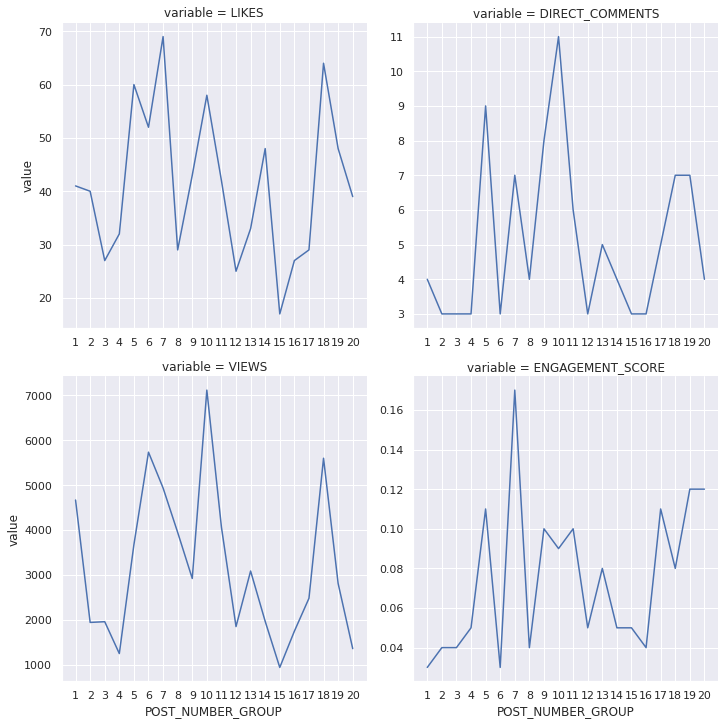

In [190]:
average_plot = sns.relplot(
    data=rolling_average_df,
    x='POST_NUMBER_GROUP',
    y='value',
    col='variable',
    col_wrap=2,
    kind='line',
    facet_kws={'sharey':False, 'sharex':False}
)
average_plot.set(xticks=range(1, max(rolling_average_df['POST_NUMBER_GROUP']) + 1))

**I want to know what was happening with the POST_NUMBER_GROUP with the highest median VIEWS:**

In [191]:
MAX_GROUP_NUMBER = rolling_average_df \
    .loc[rolling_average_df['variable'] == 'VIEWS'] \
    .sort_values('value', ascending=False) \
    .reset_index(drop=True) \
    .loc[0, 'POST_NUMBER_GROUP']

group_df = post_group_df[post_group_df['POST_NUMBER_GROUP'] == MAX_GROUP_NUMBER].copy().reset_index(drop=True)
for i in range(0, len(group_df)):
    print(f'Group Number: {MAX_GROUP_NUMBER}')
    print(group_df['POST_URL'][i])
    print(group_df['RAW_TEXT'][i], '\n')
    print(group_df.iloc[i][cont_vars])
    print('='*50, '\n')

Group Number: 10
https://www.linkedin.com/posts/mafreeman2_mondaymotivation-tuesdaytips-wednesdaywork-activity-6800491652101349376-2Bm4
Looking for feedback from my network as I try to up my LinkedIn content game! Thoughts on the following schedule?#MondayMotivationMotivation to start the week off right, as well as sharing experiences of others that inspire me.#TuesdayTipsVarious tips to help you on your data science journey.#WednesdayWorkSharing experiences from my current week to give you a glimpse of what working as a data scientist is like.#ThursdayThoughtsThoughts on topics I am passionate about to hopefully spark conversations in the comments (e.g. future of data science, AI ethics, blockchain, etc.)#FridayFriendsSharing awesome work and or content from my network in the data space.Any other content you want to see?#DataHustle #datascience #ai #machinelearning #data #analytics #deeplearning #ml #datascientist #r #python #sql 

LIKES                   63
DIRECT_COMMENTS         12

**I also want to know what was happening with the POST_NUMBER_GROUP with the lowest median VIEWS:**

In [192]:
MIN_GROUP_NUMBER = rolling_average_df \
    .loc[rolling_average_df['variable'] == 'VIEWS'] \
    .sort_values('value', ascending=True) \
    .reset_index(drop=True) \
    .loc[0, 'POST_NUMBER_GROUP']

group_df = post_group_df[post_group_df['POST_NUMBER_GROUP'] == MIN_GROUP_NUMBER].copy().reset_index(drop=True)
for i in range(0, len(group_df)):
    print(f'Group Number: {MIN_GROUP_NUMBER}')
    print(group_df['POST_URL'][i])
    print(group_df['RAW_TEXT'][i], '\n')
    print(group_df.iloc[i][cont_vars])
    print('='*50, '\n')

Group Number: 15
https://www.linkedin.com/posts/mafreeman2_registry-of-open-data-on-aws-activity-6811684433456984064-2v4L
👀 Looking for an interesting dataset for your next portfolio project? Then check out Amazon AWS's free registry of open data!👇🏽 Below are three datasets I find really interesting:🧠 Open NeuroData: "... multiple neuroimaging datasets... across multiple modalities and scales, ranging from nanoscale... to microscale... and mesoscale..."🚖 New York City Taxi and Limousine Commission (TLC) Trip Record Data: "Data of trips taken by taxis and for-hire vehicles in New York City."🛰️ NASA NEX: "A collection of Earth science datasets maintained by NASA, including climate change projections and satellite images of the Earth's surface."🎤 Please leave a comment if you find any other interesting datasets in this registry!#OnTheMarkData #FridayFinds #datasets #aws #amazon #ml #startups #dataanalysis, #datascientists #dataengineering #data #ai #datascience #dataanalytics #machinelear

### 2. Are higher views correlated higher with comments or like?
Though correlation heat maps are fun to make, I want to note that these figures should be for internal use as they are often very overwhelming to an audience. From this heatmap I can see that comments and likes are unsurprisingly very much correlated with views (with likes being slightly more correlated than comments). I honestly don't find these results that useful for this analysis, but still worth illustrating and I think it's a great step in any exploratory analysis. If we were doing regression, this would be very useful for identifying heteroscedasticity. 

<AxesSubplot:>

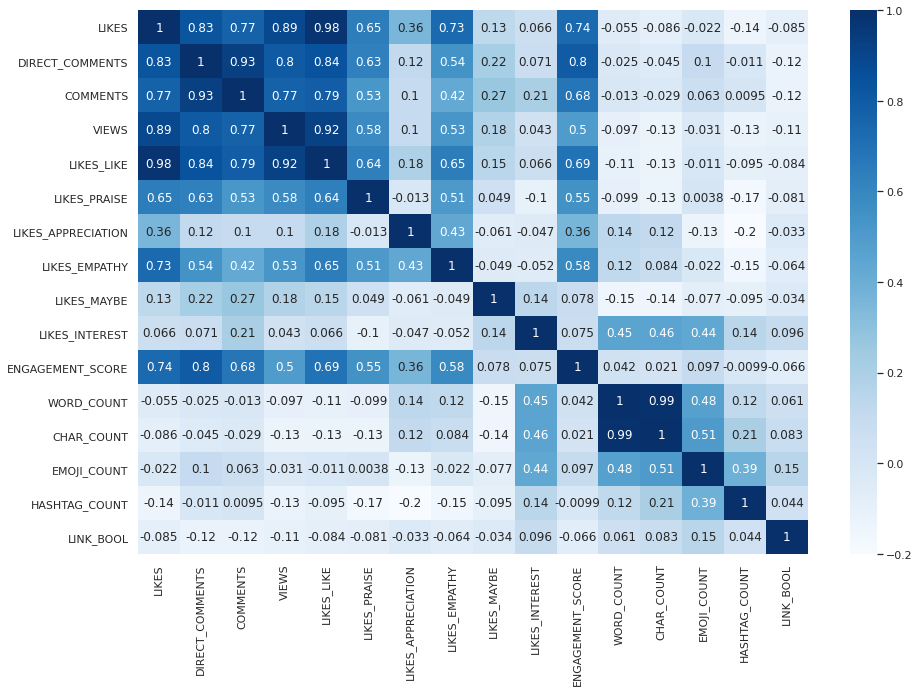

In [193]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(
    data=posts_final_df.corr(),
    cmap='Blues',
    annot=True
    )

### 3. Do links present in a post result in lower post views?
T-test comparing post views among posts with links and without links (may need to adjust if distribution is not normal).  

Since our distributions are non-normal, we are are going to use the Mann Whitney U Test. In addition, since the sample size for links are so small I am hesistant to make a definitve statement if the null hypothesis is rejected, but it should be seen as a starting point for further analysis when more data is avaialble.  

***Steps:***  
1. Get summary stats of continous variables startified by whether or not a post has a link.
2. Plot the distributions of the outcome variables (normalizing values only for plots).
3. Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses.

In [194]:
cont_vars = [
    'LIKES', 'DIRECT_COMMENTS', 'COMMENTS', 'VIEWS', 'LIKES_LIKE',
    'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE',
    'LIKES_INTEREST', 'ENGAGEMENT_SCORE', 'WORD_COUNT', 'CHAR_COUNT', 
    'EMOJI_COUNT', 'HASHTAG_COUNT'
]

TableOne(posts_final_df, columns=cont_vars, nonnormal=cont_vars, groupby=['LINK_BOOL'], missing=False)

Grouped by LINK_BOOL                                                
                                                    Overall                   False                    True
n                                                        98                      95                       3
LIKES, median [Q1,Q3]                      42.5 [26.2,69.8]        48.0 [27.0,70.0]        17.0 [17.0,25.0]
DIRECT_COMMENTS, median [Q1,Q3]               5.0 [3.0,9.0]           5.0 [3.0,9.0]           2.0 [1.5,3.5]
COMMENTS, median [Q1,Q3]                     8.0 [4.0,16.8]          8.0 [4.0,17.5]           5.0 [4.0,5.0]
VIEWS, median [Q1,Q3]                3192.5 [1557.8,6164.5]  3351.0 [1720.5,6588.5]    856.0 [848.5,1070.5]
LIKES_LIKE, median [Q1,Q3]                 33.0 [21.0,54.8]        33.0 [21.5,55.0]        12.0 [11.5,19.0]
LIKES_PRAISE, median [Q1,Q3]                  1.0 [0.0,4.0]           1.0 [0.0,4.0]           0.0 [0.0,0.5]
LIKES_APPRECIATION, median [Q1,Q3]            0.0 [0.0,1.0]           0.0 [0.0,1.0]           0.0 [0.0,0.5]
LIKES_EMPATHY, median [Q1,Q3]                 2.0 [0.0,5.0]           2.0 [0.0,5.5]           0.0 [0.0,2.5]
LIKES_MAYBE, median [Q1,Q3]                   0.0 [0.0,1.0]           0.0 [0.0,1.0]           0.0 [0.0,0.5]
LIKES_INTEREST, median [Q1,Q3]                1.0 [0.0,3.0]           1.0 [0.0,2.5]           5.0 [2.5,5.0]
ENGAGEMENT_SCORE, median [Q1,Q3]              0.1 [0.0,0.1]           0.1 [0.0,0.1]           0.0 [0.0,0.1]
WORD_COUNT, median [Q1,Q3]               145.5 [99.0,202.2]      142.0 [98.5,203.5]     162.0 [153.5,175.5]
CHAR_COUNT, median [Q1,Q3]             917.5 [622.2,1240.5]    916.0 [606.5,1240.0]  1148.0 [1004.0,1199.0]
EMOJI_COUNT, median [Q1,Q3]                   0.5 [0.0,6.0]           0.0 [0.0,6.0]           6.0 [5.0,6.5]
HASHTAG_COUNT, median [Q1,Q3]               10.5 [7.0,15.0]         10.0 [7.0,15.0]        13.0 [11.0,14.0]

In [195]:
link_status = posts_final_df['LINK_BOOL'].unique()
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
alpha = 0.05

for var in outcome_variables:
    link_status_dict = {status:posts_final_df[posts_final_df['LINK_BOOL'] == status][var] for status in link_status}
    stat, p = mannwhitneyu(*link_status_dict.values(), alternative='two-sided')
    print(
        f'Testing: {var}',
        '\n',
        f'Null Hypothesis: {var} are the same for all theme groups.',
        '\n',
        f'alpha = {alpha}',
        ' '*4,
        f'statistic: {stat}',
        ' '*4,
        f'p-value: {p}',
        )
    if p < alpha:
        print('-> Reject null hypothesis.')
    else:
        print('-> Fail to reject null hypothesis.')
    print('='*85, '\n')

Testing: LIKES 
 Null Hypothesis: LIKES are the same for all theme groups. 
 alpha = 0.05      statistic: 229.0      p-value: 0.07605333629272555
-> Fail to reject null hypothesis.

Testing: DIRECT_COMMENTS 
 Null Hypothesis: DIRECT_COMMENTS are the same for all theme groups. 
 alpha = 0.05      statistic: 223.5      p-value: 0.09530344456958094
-> Fail to reject null hypothesis.

Testing: VIEWS 
 Null Hypothesis: VIEWS are the same for all theme groups. 
 alpha = 0.05      statistic: 258.0      p-value: 0.017709060315584262
-> Reject null hypothesis.

Testing: ENGAGEMENT_SCORE 
 Null Hypothesis: ENGAGEMENT_SCORE are the same for all theme groups. 
 alpha = 0.05      statistic: 174.0      p-value: 0.5216019492208426
-> Fail to reject null hypothesis.



### 4. Did my weekday theme campaign (e.g. "#MondayMotivation", "#TuesdayTours", etc.) result in higher engagement?  
- T-test comparing posts that are part of the theme campaign and not part of the campaign, comparing Engagement Score.
- ANOVA to determine if any weekday themes performed better, comparing Engagement Score.  

Again... we will have to account for the non-normal data for our statistical tests.

***Steps:***  
1. Assign theme status for each post.
2. Get summary stats of continous variables startified by whether or not a post was part of the theme campaign.
3. Plot the distributions of the outcome variables (normalizing values only for plots).
4. Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses.
5. Get summary stats of continous variables startified by their respective theme.
6. Plot the distributions of the outcome variables (normalizing values only for plots).
7. Conduct the Kruskal-Wallis ANOVA Test to determine if we can reject our null hypotheses.

In [196]:
# 1. Assign theme status for each post.
theme_df = posts_final_df \
    .copy() \
    .assign(
        THEME_STATUS = posts_final_df['THEME'].apply(
            lambda x: 'No Theme' if x == 'no_theme' else 'Theme'
            )
        )

In [197]:
# 2. Get summary stats of continous variables startified by whether or not a post was part of the theme campaign.
cont_vars = [
    'LIKES', 'DIRECT_COMMENTS', 'COMMENTS', 'VIEWS', 'LIKES_LIKE',
    'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE',
    'LIKES_INTEREST', 'ENGAGEMENT_SCORE', 'WORD_COUNT', 'CHAR_COUNT', 
    'EMOJI_COUNT', 'HASHTAG_COUNT'
]

TableOne(theme_df, columns=cont_vars, nonnormal=cont_vars, groupby=['THEME_STATUS'], missing=False)

Grouped by THEME_STATUS                                                
                                                    Overall                No Theme                   Theme
n                                                        98                      71                      27
LIKES, median [Q1,Q3]                      42.5 [26.2,69.8]        42.0 [27.0,83.0]        48.0 [24.0,56.0]
DIRECT_COMMENTS, median [Q1,Q3]               5.0 [3.0,9.0]           5.0 [3.0,9.5]           5.0 [3.0,8.5]
COMMENTS, median [Q1,Q3]                     8.0 [4.0,16.8]          8.0 [4.0,17.5]          8.0 [4.5,15.0]
VIEWS, median [Q1,Q3]                3192.5 [1557.8,6164.5]  3671.0 [1779.0,7578.5]  2476.0 [1265.5,3863.5]
LIKES_LIKE, median [Q1,Q3]                 33.0 [21.0,54.8]        33.0 [22.0,63.0]        26.0 [18.5,44.0]
LIKES_PRAISE, median [Q1,Q3]                  1.0 [0.0,4.0]           1.0 [0.0,5.0]           1.0 [0.0,3.0]
LIKES_APPRECIATION, median [Q1,Q3]            0.0 [0.0,1.0]           0.0 [0.0,1.0]           0.0 [0.0,1.0]
LIKES_EMPATHY, median [Q1,Q3]                 2.0 [0.0,5.0]           2.0 [0.0,5.0]           1.0 [0.0,6.0]
LIKES_MAYBE, median [Q1,Q3]                   0.0 [0.0,1.0]           0.0 [0.0,1.0]           0.0 [0.0,1.0]
LIKES_INTEREST, median [Q1,Q3]                1.0 [0.0,3.0]           0.0 [0.0,2.0]           2.0 [0.5,5.0]
ENGAGEMENT_SCORE, median [Q1,Q3]              0.1 [0.0,0.1]           0.1 [0.0,0.1]           0.1 [0.0,0.1]
WORD_COUNT, median [Q1,Q3]               145.5 [99.0,202.2]      122.0 [86.5,188.0]     189.0 [133.5,220.0]
CHAR_COUNT, median [Q1,Q3]             917.5 [622.2,1240.5]    808.0 [574.0,1144.0]   1181.0 [879.0,1284.0]
EMOJI_COUNT, median [Q1,Q3]                   0.5 [0.0,6.0]           0.0 [0.0,3.0]           6.0 [3.5,8.5]
HASHTAG_COUNT, median [Q1,Q3]               10.5 [7.0,15.0]          9.0 [7.0,13.0]        15.0 [13.0,18.5]

In [198]:
# 3. Plot the distributions of the outcome variables (normalizing values only for plots).
# scaling variables as we are mainly interested in distribution rather than the values themselves
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
scaler = MinMaxScaler()

theme_plot_df = theme_df.copy()
theme_plot_df[outcome_variables] = scaler.fit_transform(theme_plot_df[outcome_variables])
theme_plot_df = theme_plot_df.melt(id_vars=['POST_URN', 'THEME', 'THEME_STATUS'], value_vars=outcome_variables)

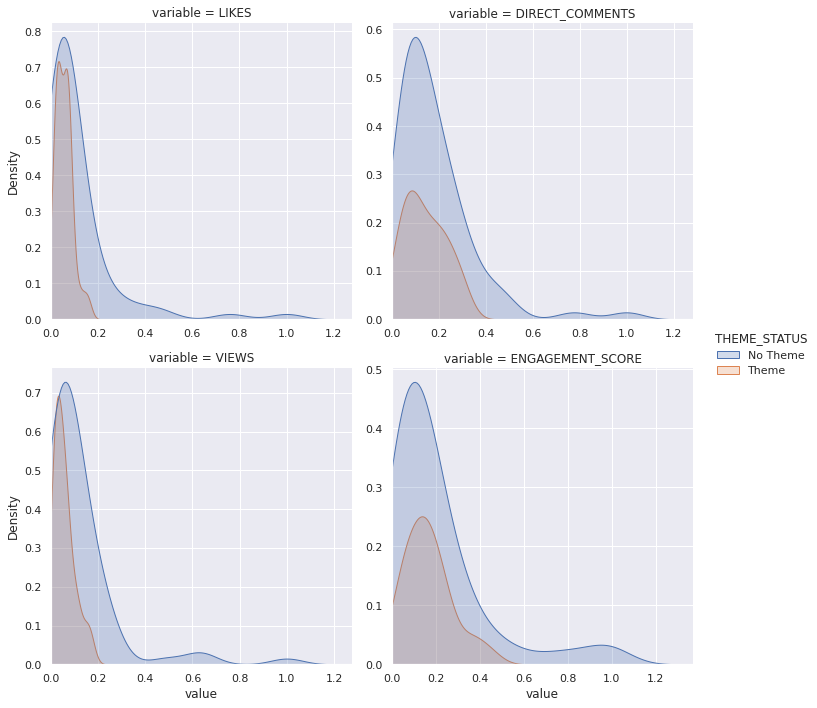

In [199]:
theme_plot = sns.displot(
    data=theme_plot_df,
    x='value',
    col='variable',
    hue='THEME_STATUS',
    col_wrap=2,
    kind='kde',
    fill=True,
    facet_kws={'sharey':False, 'sharex':False}
)
theme_plot.set(xlim=(0, None))

In [200]:
# 4. Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses.
theme_status = theme_df['THEME_STATUS'].unique()
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
alpha = 0.05

for var in outcome_variables:
    themes_status_dict = {status:theme_df[theme_df['THEME_STATUS'] == status][var] for status in theme_status}
    stat, p = mannwhitneyu(*themes_status_dict.values(), alternative='two-sided')
    print(
        f'Testing: {var}',
        '\n',
        f'Null Hypothesis: {var} are the same for all theme groups.',
        '\n',
        f'alpha = {alpha}',
        ' '*4,
        f'statistic: {stat}',
        ' '*4,
        f'p-value: {p}',
        )
    if p < alpha:
        print('-> Reject null hypothesis.')
    else:
        print('-> Fail to reject null hypothesis.')
    print('='*85, '\n')

Testing: LIKES 
 Null Hypothesis: LIKES are the same for all theme groups. 
 alpha = 0.05      statistic: 1106.0      p-value: 0.2423126601053417
-> Fail to reject null hypothesis.

Testing: DIRECT_COMMENTS 
 Null Hypothesis: DIRECT_COMMENTS are the same for all theme groups. 
 alpha = 0.05      statistic: 1025.5      p-value: 0.5952028710084591
-> Fail to reject null hypothesis.

Testing: VIEWS 
 Null Hypothesis: VIEWS are the same for all theme groups. 
 alpha = 0.05      statistic: 1229.0      p-value: 0.0317952206067232
-> Reject null hypothesis.

Testing: ENGAGEMENT_SCORE 
 Null Hypothesis: ENGAGEMENT_SCORE are the same for all theme groups. 
 alpha = 0.05      statistic: 911.0      p-value: 0.7079226010964143
-> Fail to reject null hypothesis.



In [201]:
# 5. Get summary stats of continous variables startified by their respective theme.
cont_vars = [
    'LIKES', 'DIRECT_COMMENTS', 'COMMENTS', 'VIEWS', 'LIKES_LIKE',
    'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE',
    'LIKES_INTEREST', 'ENGAGEMENT_SCORE', 'WORD_COUNT', 'CHAR_COUNT', 
    'EMOJI_COUNT', 'HASHTAG_COUNT'
]

TableOne(theme_df, columns=cont_vars, nonnormal=cont_vars, groupby=['THEME'], missing=False)

Grouped by THEME                                                                                                                                                
                                                    Overall            friday_finds       monday_motivation                no_theme       thursday_thoughts           tuesday_tours          wednesday_work
n                                                        98                       4                       7                      71                       5                       5                       6
LIKES, median [Q1,Q3]                      42.5 [26.2,69.8]        51.5 [31.2,75.2]        53.0 [40.5,56.5]        42.0 [27.0,83.0]        29.0 [28.0,48.0]        17.0 [17.0,23.0]        48.5 [30.8,54.2]
DIRECT_COMMENTS, median [Q1,Q3]               5.0 [3.0,9.0]           6.5 [5.0,8.2]           6.0 [4.5,9.5]           5.0 [3.0,9.5]           4.0 [2.0,9.0]           2.0 [1.0,3.0]           5.0 [3.0,7.0]
COMMENTS, median [Q1,Q3]                     8.0 [4.0,16.8]          9.0 [7.2,13.5]         10.0 [7.5,17.0]          8.0 [4.0,17.5]          6.0 [2.0,23.0]           5.0 [3.0,6.0]          7.0 [4.0,12.2]
VIEWS, median [Q1,Q3]                3192.5 [1557.8,6164.5]  2650.5 [1256.0,5206.8]  3115.0 [2329.5,4929.5]  3671.0 [1779.0,7578.5]  2476.0 [1963.0,3351.0]    856.0 [841.0,1743.0]  2759.5 [1625.5,3802.0]
LIKES_LIKE, median [Q1,Q3]                 33.0 [21.0,54.8]        43.0 [25.5,61.2]        43.0 [27.5,45.5]        33.0 [22.0,63.0]        19.0 [18.0,26.0]        12.0 [11.0,19.0]        39.0 [24.5,40.8]
LIKES_PRAISE, median [Q1,Q3]                  1.0 [0.0,4.0]           2.0 [0.8,3.0]           2.0 [0.5,3.0]           1.0 [0.0,5.0]           1.0 [0.0,3.0]           0.0 [0.0,1.0]           1.0 [1.0,1.8]
LIKES_APPRECIATION, median [Q1,Q3]            0.0 [0.0,1.0]           0.0 [0.0,0.2]           1.0 [0.5,1.0]           0.0 [0.0,1.0]           0.0 [0.0,1.0]           0.0 [0.0,0.0]           0.0 [0.0,0.0]
LIKES_EMPATHY, median [Q1,Q3]                 2.0 [0.0,5.0]           3.5 [1.5,5.8]           3.0 [1.0,9.5]           2.0 [0.0,5.0]           2.0 [0.0,7.0]           0.0 [0.0,0.0]           1.5 [1.0,2.0]
LIKES_MAYBE, median [Q1,Q3]                   0.0 [0.0,1.0]           0.0 [0.0,0.2]           0.0 [0.0,0.5]           0.0 [0.0,1.0]           0.0 [0.0,5.0]           0.0 [0.0,1.0]           0.0 [0.0,0.0]
LIKES_INTEREST, median [Q1,Q3]                1.0 [0.0,3.0]           3.5 [1.5,7.2]           1.0 [1.0,2.5]           0.0 [0.0,2.0]           0.0 [0.0,2.0]           4.0 [4.0,5.0]           5.5 [2.0,6.8]
ENGAGEMENT_SCORE, median [Q1,Q3]              0.1 [0.0,0.1]           0.1 [0.1,0.1]           0.1 [0.1,0.1]           0.1 [0.0,0.1]           0.1 [0.0,0.1]           0.0 [0.0,0.0]           0.1 [0.1,0.1]
WORD_COUNT, median [Q1,Q3]               145.5 [99.0,202.2]     134.5 [113.2,179.0]     190.0 [154.5,205.0]      122.0 [86.5,188.0]      134.0 [60.0,137.0]     189.0 [162.0,237.0]     216.0 [196.5,239.2]
CHAR_COUNT, median [Q1,Q3]             917.5 [622.2,1240.5]    879.0 [780.0,1083.8]   1181.0 [942.0,1284.0]    808.0 [574.0,1144.0]     940.0 [463.0,944.0]  1250.0 [1148.0,1494.0]  1264.0 [1241.0,1455.0]
EMOJI_COUNT, median [Q1,Q3]                   0.5 [0.0,6.0]           5.5 [4.0,7.5]           5.0 [0.0,7.0]           0.0 [0.0,3.0]           3.0 [0.0,4.0]          7.0 [6.0,10.0]           6.5 [6.0,8.5]
HASHTAG_COUNT, median [Q1,Q3]               10.5 [7.0,15.0]        15.5 [12.2,18.2]        17.0 [14.5,17.5]          9.0 [7.0,13.0]        19.0 [14.0,19.0]        16.0 [15.0,19.0]        13.5 [13.0,14.0]

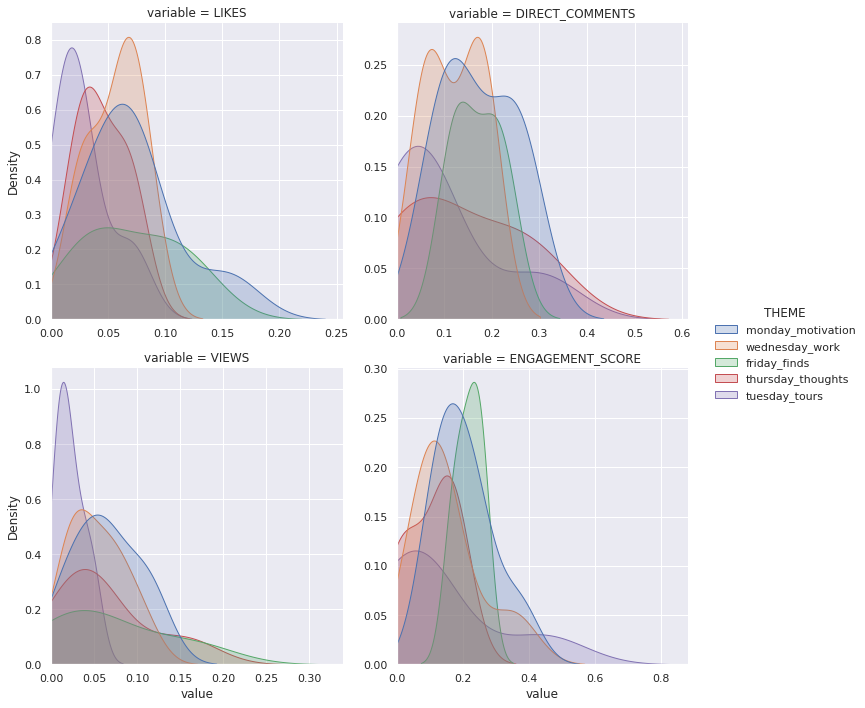

In [202]:
# 6. Plot the distributions of the outcome variables (normalizing values only for plots).
theme_plot = sns.displot(
    data=theme_plot_df[theme_plot_df['THEME_STATUS'] != 'No Theme'],
    x='value',
    col='variable',
    hue='THEME',
    col_wrap=2,
    kind='kde',
    fill=True,
    facet_kws={'sharey':False, 'sharex':False}
)
theme_plot.set(xlim=(0, None))

In [203]:
# 7. Conduct the Kruskal-Wallis ANOVA Test to determine if we can reject our null hypotheses.
# Note: due to the small sample size, and "friday_finds" having less than 5 observations (sample
# size threshold for this test), I don't expect much from this specific analysis.
unique_themes = theme_df[theme_df['THEME'] != 'no_theme']['THEME'].unique()
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
alpha = 0.05

for var in outcome_variables:
    unique_themes_dict = {theme:theme_df[theme_df['THEME'] == theme][var] for theme in unique_themes}
    stat, p = kruskal(*unique_themes_dict.values())
    print(
        f'Testing: {var}',
        '\n',
        f'Null Hypothesis: {var} are the same for all theme groups.',
        '\n',
        f'alpha = {alpha}',
        ' '*4,
        f'statistic: {stat}',
        ' '*4,
        f'p-value: {p}',
        )
    if p < alpha:
        print('-> Reject null hypothesis.')
    else:
        print('-> Fail to reject null hypothesis.')
    print('='*85, '\n')

Testing: LIKES 
 Null Hypothesis: LIKES are the same for all theme groups. 
 alpha = 0.05      statistic: 7.075714285714273      p-value: 0.13194076103125157
-> Fail to reject null hypothesis.

Testing: DIRECT_COMMENTS 
 Null Hypothesis: DIRECT_COMMENTS are the same for all theme groups. 
 alpha = 0.05      statistic: 4.218903896637178      p-value: 0.37719029407512894
-> Fail to reject null hypothesis.

Testing: VIEWS 
 Null Hypothesis: VIEWS are the same for all theme groups. 
 alpha = 0.05      statistic: 5.173582766439893      p-value: 0.26994599851548307
-> Fail to reject null hypothesis.

Testing: ENGAGEMENT_SCORE 
 Null Hypothesis: ENGAGEMENT_SCORE are the same for all theme groups. 
 alpha = 0.05      statistic: 7.676009579470043      p-value: 0.10419382759770235
-> Fail to reject null hypothesis.



### 5. What are the main drivers of engagement on posts:  
Random forests are one of the most versatile models in machine learning! Beyond being able to handle non-normal data very well, you can also use the model to quickly understand feature importance. Though there are not that many drivers for this question, when we move onto vectorized hashtags and content in the next questions, this will become extremely useful. Specifically, it will help us zone in on the most important words-- out of hundreds-- to focus further analytics on.
1. Fit a random forest model where the independent variable is the selected outcome variable and the dependent variables are Number of Words, Number of Characters, Number of Emojis, and Number of Hashtags.
2. Extract feature importance
3. Plot most important feature to outcome variable

In [204]:
# 1. Fit a random forest model where the independent variable is the selected outcome
#    variable and the dependent variables are Number of Words, Number of Characters,
#    Number of Emojis, and Number of Hashtags.
# 2. Extract feature importance
drivers = ['WORD_COUNT', 'CHAR_COUNT', 'EMOJI_COUNT', 'HASHTAG_COUNT', 'LINK_BOOL']
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']

for var in outcome_variables:
    # data
    X = posts_final_df[drivers].copy()
    y = posts_final_df[var].copy()

    # fit model
    random_forest = RandomForestRegressor()
    random_forest.fit(X, y)

    # feature importance
    feature_importance = pd \
        .DataFrame({'feature':X.columns, 'importance':random_forest.feature_importances_}) \
        .sort_values(by='importance', ascending=False) \
        .reset_index(drop=True)

    print(f'{var}:')
    display(feature_importance.head())

LIKES:


,feature,importance
0,CHAR_COUNT,0.371764
1,WORD_COUNT,0.295370
2,HASHTAG_COUNT,0.194155
3,EMOJI_COUNT,0.137123
4,LINK_BOOL,0.001589


DIRECT_COMMENTS:


,feature,importance
0,CHAR_COUNT,0.385612
1,WORD_COUNT,0.300607
2,HASHTAG_COUNT,0.166521
3,EMOJI_COUNT,0.141304
4,LINK_BOOL,0.005956


VIEWS:


,feature,importance
0,WORD_COUNT,0.352180
1,CHAR_COUNT,0.346485
2,HASHTAG_COUNT,0.150928
3,EMOJI_COUNT,0.145649
4,LINK_BOOL,0.004758


ENGAGEMENT_SCORE:


,feature,importance
0,WORD_COUNT,0.325614
1,CHAR_COUNT,0.299149
2,HASHTAG_COUNT,0.243574
3,EMOJI_COUNT,0.130334
4,LINK_BOOL,0.001329


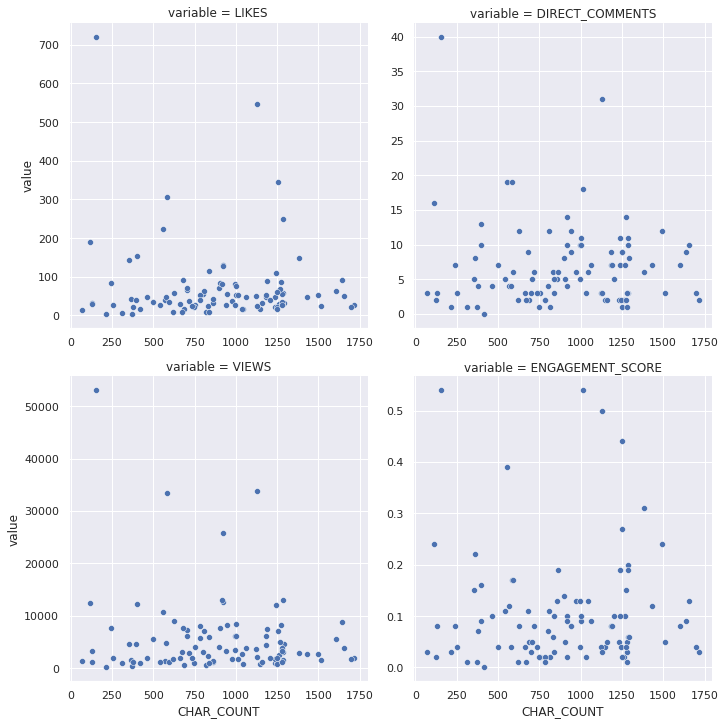

In [205]:
# 3. Plot most important feature to outcome variable
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
char_plot_df = posts_final_df.melt(id_vars=['POST_URN', 'CHAR_COUNT'], value_vars=outcome_variables)

sns.relplot(
    data=char_plot_df,
    x='CHAR_COUNT',
    y='value',
    col='variable',
    col_wrap=2,
    kind='scatter',
    facet_kws={'sharey':False, 'sharex':False}
)

### 6. Are there any specific hashtags I should be using more to driving engagement?
1. Fit a random forest model where the independent variable is the selected outcome variable and the dependent variables arethe TF-IDF Vectorizer hashtags.
2. Extract feature importance.
3. For the most important feature, assign status of whether or not feature is present for each post.
5. Plot the distributions of the outcome variables (normalizing values only for plots).
6. Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses for the feature importance.

In [206]:
# 1. Fit a random forest model where the independent variable is the selected outcome variable
#    and the dependent variables arethe TF-IDF Vectorizer hashtags.
# 2. Extract feature importance.
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']

for var in outcome_variables:
    # data
    X = hashtags_final_df \
        .copy() \
        .drop(['POST_URN', 'HASHTAGS'], axis=1)
    y = posts_final_df[var].copy()

    # fit model
    random_forest = RandomForestRegressor()
    random_forest.fit(X, y)

    # feature importance
    feature_importance = pd \
        .DataFrame({'feature':X.columns, 'importance':random_forest.feature_importances_}) \
        .sort_values(by='importance', ascending=False) \
        .reset_index(drop=True)
    
    print(f'{var}:')
    display(feature_importance.head(10))

LIKES:


,feature,importance
0,analytics,0.323480
1,python,0.094420
2,statistics,0.070158
3,growth,0.066096
4,datahustle,0.062745
5,mentalhealth,0.048046
6,blacklivesmatter,0.021821
7,saytheirnames,0.021798
8,programming,0.021736
9,github,0.021127


DIRECT_COMMENTS:


,feature,importance
0,analytics,0.268069
1,python,0.089453
2,statistics,0.055693
3,datahustle,0.052962
4,data,0.051444
5,programming,0.046889
6,datascience,0.041518
7,hiring,0.032157
8,github,0.030280
9,sql,0.025571


VIEWS:


,feature,importance
0,analytics,0.287858
1,statistics,0.117225
2,python,0.079120
3,programming,0.037977
4,datascience,0.035882
5,datahustle,0.027907
6,mentalhealth,0.026429
7,nudges,0.026326
8,top10,0.026260
9,humu,0.025764


ENGAGEMENT_SCORE:


,feature,importance
0,analytics,0.265463
1,hiring,0.063662
2,jobannouncement,0.039463
3,python,0.039306
4,blacklivesmatter,0.038042
5,jobavailable,0.036996
6,datahustle,0.035454
7,saytheirnames,0.033215
8,statistics,0.032144
9,dataanalyst,0.028665


In [207]:
# 3. For the most important feature, assign status of whether or not feature is present for each post.
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
analytics_hashtag_df = posts_final_df.copy()
analytics_hashtag_df['ANALYTICS_STATUS'] = analytics_hashtag_df['HASHTAGS'].str.contains('analytics', regex=False)

In [208]:
# 4. Summary stats comparing posts with and without most important feature.
cont_vars = [
    'LIKES', 'DIRECT_COMMENTS', 'COMMENTS', 'VIEWS', 'LIKES_LIKE',
    'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE',
    'LIKES_INTEREST', 'ENGAGEMENT_SCORE', 'WORD_COUNT', 'CHAR_COUNT', 
    'EMOJI_COUNT', 'HASHTAG_COUNT'
]

TableOne(analytics_hashtag_df, columns=cont_vars, nonnormal=cont_vars, groupby=['ANALYTICS_STATUS'], missing=False)

Grouped by ANALYTICS_STATUS                                                
                                                        Overall                   False                    True
n                                                            98                      31                      67
LIKES, median [Q1,Q3]                          42.5 [26.2,69.8]        32.0 [23.5,79.0]        48.0 [27.5,61.5]
DIRECT_COMMENTS, median [Q1,Q3]                   5.0 [3.0,9.0]           5.0 [2.0,8.5]           5.0 [3.0,9.0]
COMMENTS, median [Q1,Q3]                         8.0 [4.0,16.8]          9.0 [4.0,14.5]          8.0 [4.5,17.5]
VIEWS, median [Q1,Q3]                    3192.5 [1557.8,6164.5]  3945.0 [1289.0,7626.5]  3084.0 [1720.5,5854.5]
LIKES_LIKE, median [Q1,Q3]                     33.0 [21.0,54.8]        29.0 [18.0,59.5]        33.0 [23.0,49.5]
LIKES_PRAISE, median [Q1,Q3]                      1.0 [0.0,4.0]           0.0 [0.0,3.5]           1.0 [1.0,4.0]
LIKES_APPRECIATION, median [Q1,Q3]                0.0 [0.0,1.0]           0.0 [0.0,1.5]           0.0 [0.0,1.0]
LIKES_EMPATHY, median [Q1,Q3]                     2.0 [0.0,5.0]           2.0 [0.0,6.5]           2.0 [0.0,5.0]
LIKES_MAYBE, median [Q1,Q3]                       0.0 [0.0,1.0]           0.0 [0.0,0.5]           0.0 [0.0,1.0]
LIKES_INTEREST, median [Q1,Q3]                    1.0 [0.0,3.0]           1.0 [0.0,2.0]           1.0 [0.0,3.0]
ENGAGEMENT_SCORE, median [Q1,Q3]                  0.1 [0.0,0.1]           0.1 [0.0,0.1]           0.1 [0.0,0.1]
WORD_COUNT, median [Q1,Q3]                   145.5 [99.0,202.2]     162.0 [104.5,207.0]      133.0 [99.0,192.5]
CHAR_COUNT, median [Q1,Q3]                 917.5 [622.2,1240.5]   1000.0 [623.5,1251.0]    860.0 [626.5,1219.5]
EMOJI_COUNT, median [Q1,Q3]                       0.5 [0.0,6.0]           0.0 [0.0,5.5]           1.0 [0.0,6.0]
HASHTAG_COUNT, median [Q1,Q3]                   10.5 [7.0,15.0]           7.0 [3.5,9.0]        14.0 [10.0,16.5]

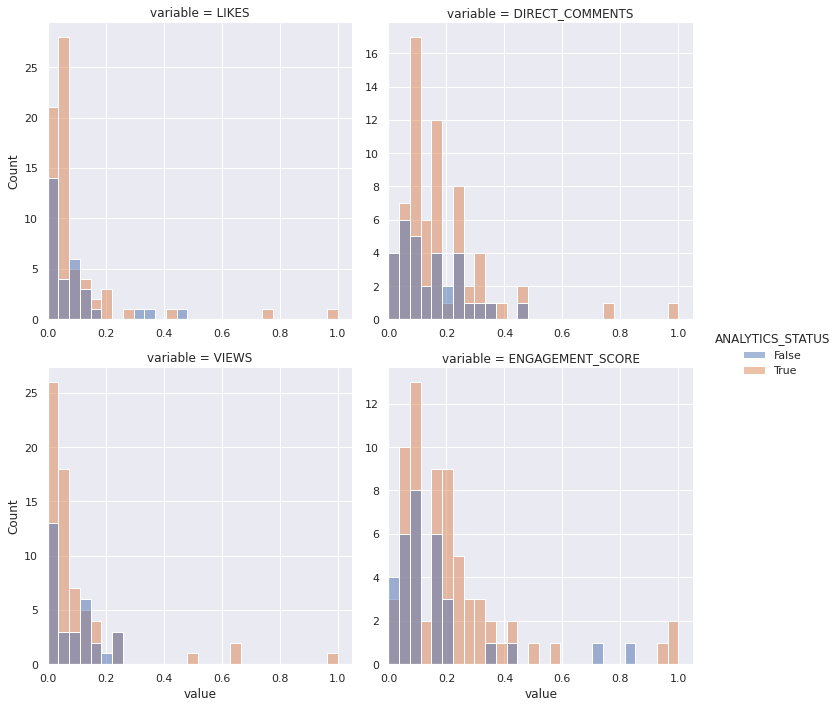

In [209]:
# 5. Plot the distributions of the outcome variables (normalizing values only for plots).
analytics_hashtag_plot_df = analytics_hashtag_df.copy()
analytics_hashtag_plot_df[outcome_variables] = scaler.fit_transform(analytics_hashtag_plot_df[outcome_variables])
analytics_hashtag_plot_df = analytics_hashtag_plot_df.melt(id_vars=['POST_URN', 'ANALYTICS_STATUS'], value_vars=outcome_variables)

hashtag_plot = sns.displot(
    data=analytics_hashtag_plot_df,
    x='value',
    col='variable',
    hue='ANALYTICS_STATUS',
    col_wrap=2,
    kind='hist',
    fill=True,
    facet_kws={'sharey':False, 'sharex':False}
)
hashtag_plot.set(xlim=(0, None))

In [210]:
# 6. Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses for the feature importance.
analytics_status = analytics_hashtag_df['ANALYTICS_STATUS'].unique()
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
alpha = 0.05

for var in outcome_variables:
    link_status_dict = {status:analytics_hashtag_df[analytics_hashtag_df['ANALYTICS_STATUS'] == status][var] for status in analytics_status}
    stat, p = mannwhitneyu(*link_status_dict.values(), alternative='two-sided')
    print(
        f'Testing: {var}',
        '\n',
        f'Null Hypothesis: {var} are the same for all theme groups.',
        '\n',
        f'alpha = {alpha}',
        ' '*4,
        f'statistic: {stat}',
        ' '*4,
        f'p-value: {p}',
        )
    if p < alpha:
        print('-> Reject null hypothesis.')
    else:
        print('-> Fail to reject null hypothesis.')
    print('='*85, '\n')

Testing: LIKES 
 Null Hypothesis: LIKES are the same for all theme groups. 
 alpha = 0.05      statistic: 1106.0      p-value: 0.6086685727615673
-> Fail to reject null hypothesis.

Testing: DIRECT_COMMENTS 
 Null Hypothesis: DIRECT_COMMENTS are the same for all theme groups. 
 alpha = 0.05      statistic: 1160.0      p-value: 0.35301090110091327
-> Fail to reject null hypothesis.

Testing: VIEWS 
 Null Hypothesis: VIEWS are the same for all theme groups. 
 alpha = 0.05      statistic: 996.0      p-value: 0.7483221578707415
-> Fail to reject null hypothesis.

Testing: ENGAGEMENT_SCORE 
 Null Hypothesis: ENGAGEMENT_SCORE are the same for all theme groups. 
 alpha = 0.05      statistic: 1304.0      p-value: 0.04241943387126839
-> Reject null hypothesis.



### 7. Are there any specific content topics I should be posting more to drive engagement?
1. Fit a random forest model where the independent variable is the selected outcome variable and the dependent variables are the TF-IDF Vectorizer content.
2. Extract feature importance.
3. For the most important feature, assign status of whether or not feature is present for each post.
4. Summary stats comparing posts with and without most important feature.
5. Plot the distributions of the outcome variables (normalizing values only for plots).
6. Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses for the feature importance.

In [211]:
# 1. Fit a random forest model where the independent variable is the selected outcome
#    variable and the dependent variables are the TF-IDF Vectorizer content.
# 2. Extract feature importance.
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
for var in outcome_variables:
    # data
    X = content_final_df \
        .copy() \
        .drop(['POST_URN', 'CONTENT', 'CONTENT_TOKENS', 'CONTENT_PREPROCESSED'], axis=1)
    y = posts_final_df[var].copy()

    # fit model
    random_forest = RandomForestRegressor()
    random_forest.fit(X, y)

    # feature importance
    feature_importance = pd \
        .DataFrame({'feature':X.columns, 'importance':random_forest.feature_importances_}) \
        .sort_values(by='importance', ascending=False) \
        .reset_index(drop=True) \
        .head(10)
    
    print(f'{var}:')
    display(feature_importance.head(10))

LIKES:


,feature,importance
0,python,0.239596
1,go,0.094740
2,feeling,0.054191
3,github,0.047312
4,month,0.043844
5,heavy,0.039352
6,past,0.034484
7,lose,0.030323
8,actually,0.020969
9,sum,0.019142


DIRECT_COMMENTS:


,feature,importance
0,python,0.196868
1,github,0.077043
2,past,0.051448
3,researcher,0.036746
4,month,0.032471
5,feeling,0.028557
6,give,0.027623
7,code,0.023844
8,heavy,0.023000
9,experience,0.018758


VIEWS:


,feature,importance
0,python,0.198345
1,lose,0.073629
2,feeling,0.063214
3,month,0.044509
4,heavy,0.044127
5,past,0.036631
6,real,0.025136
7,write,0.017982
8,github,0.015973
9,try,0.014597


ENGAGEMENT_SCORE:


,feature,importance
0,give,0.122820
1,python,0.089174
2,consider,0.070088
3,go,0.039876
4,experience,0.025376
5,measure,0.022441
6,feeling,0.021742
7,call,0.020938
8,make,0.018569
9,insurance,0.018552


In [212]:
# 3. For the most important feature, assign status of whether or not feature is present for each post.
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
python_content_df = posts_final_df.copy()
python_content_df['PYTHON_STATUS'] = python_content_df['CONTENT'].str.contains('python', regex=False)

In [213]:
# 4. Summary stats comparing posts with and without most important feature.
cont_vars = [
    'LIKES', 'DIRECT_COMMENTS', 'COMMENTS', 'VIEWS', 'LIKES_LIKE',
    'LIKES_PRAISE', 'LIKES_APPRECIATION', 'LIKES_EMPATHY', 'LIKES_MAYBE',
    'LIKES_INTEREST', 'ENGAGEMENT_SCORE', 'WORD_COUNT', 'CHAR_COUNT', 
    'EMOJI_COUNT', 'HASHTAG_COUNT'
]

TableOne(python_content_df, columns=cont_vars, nonnormal=cont_vars, groupby=['PYTHON_STATUS'], missing=False)

Grouped by PYTHON_STATUS                                                 
                                                     Overall                   False                     True
n                                                         98                      90                        8
LIKES, median [Q1,Q3]                       42.5 [26.2,69.8]        39.5 [25.2,63.8]        95.5 [59.0,252.5]
DIRECT_COMMENTS, median [Q1,Q3]                5.0 [3.0,9.0]           5.0 [3.0,8.8]          10.0 [6.5,17.5]
COMMENTS, median [Q1,Q3]                      8.0 [4.0,16.8]          7.5 [4.0,15.0]         20.5 [10.0,32.8]
VIEWS, median [Q1,Q3]                 3192.5 [1557.8,6164.5]  2999.0 [1401.5,6099.8]  7172.5 [3654.8,17662.8]
LIKES_LIKE, median [Q1,Q3]                  33.0 [21.0,54.8]        31.5 [21.0,50.2]        80.0 [52.0,218.5]
LIKES_PRAISE, median [Q1,Q3]                   1.0 [0.0,4.0]           1.0 [0.0,3.0]           6.0 [2.8,10.2]
LIKES_APPRECIATION, median [Q1,Q3]             0.0 [0.0,1.0]           0.0 [0.0,1.0]            0.5 [0.0,2.0]
LIKES_EMPATHY, median [Q1,Q3]                  2.0 [0.0,5.0]           1.0 [0.0,5.0]           5.0 [3.8,17.0]
LIKES_MAYBE, median [Q1,Q3]                    0.0 [0.0,1.0]           0.0 [0.0,1.0]            0.0 [0.0,0.2]
LIKES_INTEREST, median [Q1,Q3]                 1.0 [0.0,3.0]           1.0 [0.0,3.0]            1.0 [0.8,2.5]
ENGAGEMENT_SCORE, median [Q1,Q3]               0.1 [0.0,0.1]           0.1 [0.0,0.1]            0.1 [0.1,0.3]
WORD_COUNT, median [Q1,Q3]                145.5 [99.0,202.2]      145.5 [99.0,203.8]      147.5 [107.0,175.8]
CHAR_COUNT, median [Q1,Q3]              917.5 [622.2,1240.5]    917.5 [622.2,1245.5]     920.5 [699.8,1077.0]
EMOJI_COUNT, median [Q1,Q3]                    0.5 [0.0,6.0]           0.0 [0.0,6.0]            3.0 [0.0,6.2]
HASHTAG_COUNT, median [Q1,Q3]                10.5 [7.0,15.0]         10.0 [7.0,15.0]         13.5 [11.8,14.8]

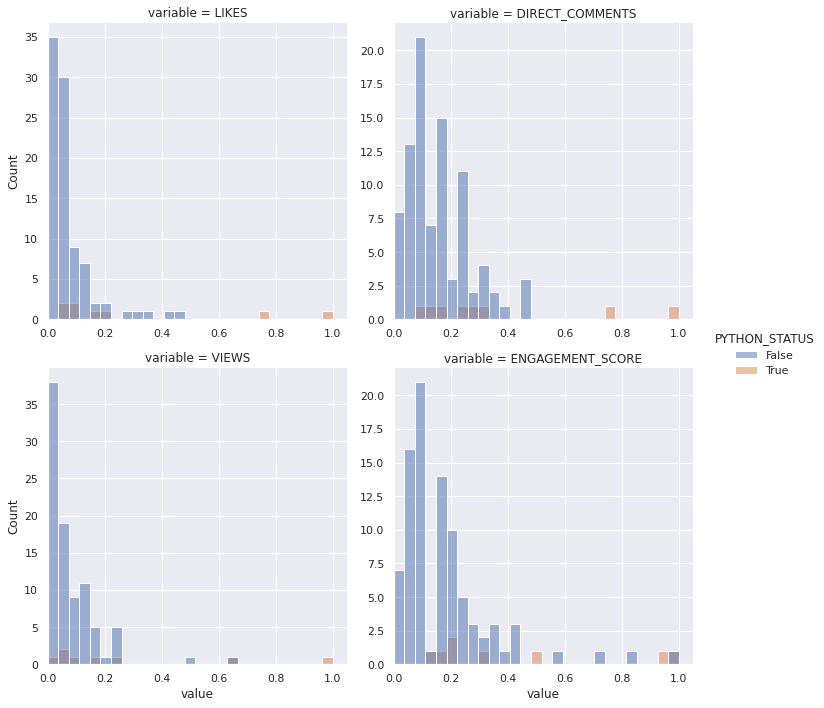

In [214]:
# 5. Plot the distributions of the outcome variables (normalizing values only for plots).
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
python_content_plot_df = python_content_df.copy()
python_content_plot_df[outcome_variables] = scaler.fit_transform(python_content_plot_df[outcome_variables])
python_content_plot_df = python_content_plot_df.melt(id_vars=['POST_URN', 'PYTHON_STATUS'], value_vars=outcome_variables)

content_plot = sns.displot(
    data=python_content_plot_df,
    x='value',
    col='variable',
    hue='PYTHON_STATUS',
    col_wrap=2,
    kind='hist',
    fill=True,
    facet_kws={'sharey':False, 'sharex':False}
)
content_plot.set(xlim=(0, None))

In [215]:
# 6. Conduct the Mann Whitney U Test to determine if we can reject our null hypotheses for the feature importance.
python_status = python_content_df['PYTHON_STATUS'].unique()
outcome_variables = ['LIKES', 'DIRECT_COMMENTS', 'VIEWS', 'ENGAGEMENT_SCORE']
alpha = 0.05

for var in outcome_variables:
    link_status_dict = {status:python_content_df[python_content_df['PYTHON_STATUS'] == status][var] for status in python_status}
    stat, p = mannwhitneyu(*link_status_dict.values(), alternative='two-sided')
    print(
        f'Testing: {var}',
        '\n',
        f'Null Hypothesis: {var} are the same for all theme groups.',
        '\n',
        f'alpha = {alpha}',
        ' '*4,
        f'statistic: {stat}',
        ' '*4,
        f'p-value: {p}',
        )
    if p < alpha:
        print('-> Reject null hypothesis.')
    else:
        print('-> Fail to reject null hypothesis.')
    print('='*85, '\n')

Testing: LIKES 
 Null Hypothesis: LIKES are the same for all theme groups. 
 alpha = 0.05      statistic: 121.5      p-value: 0.0020090395413021643
-> Reject null hypothesis.

Testing: DIRECT_COMMENTS 
 Null Hypothesis: DIRECT_COMMENTS are the same for all theme groups. 
 alpha = 0.05      statistic: 162.5      p-value: 0.010221099183062564
-> Reject null hypothesis.

Testing: VIEWS 
 Null Hypothesis: VIEWS are the same for all theme groups. 
 alpha = 0.05      statistic: 174.0      p-value: 0.016090032403451762
-> Reject null hypothesis.

Testing: ENGAGEMENT_SCORE 
 Null Hypothesis: ENGAGEMENT_SCORE are the same for all theme groups. 
 alpha = 0.05      statistic: 154.0      p-value: 0.007520008719662141
-> Reject null hypothesis.



# Analysis Summary and Discussion

1. What are my overall summary statistics for my LinkedIn posts? 
    - On average, my posts generates ~42 likes, 5 direct comments, and ~3200 views.
        - <div> <img src='notebook_images/overall_summary_stats.png' width='400'/> </div>

2. Are higher views correlated higher with comments or like?
    - Comments and likes are unsurprisingly very much correlated with views, with likes being slightly more correlated than comments-- this analysis question was unfortunately not too useful.

3. Do links present in a post result in lower post views?
    - We were able to reject the null hypothesis for views, thus our data shows that having a link present in a post reduces the number of views.
    - Median Views Without Link: 3351 views
    - Median Views With Link: 856 views
    - It is important to note that the population with links was only 3 posts, thus I would more so see this as a data point to push for further research rather than a conclusion.

4. Did my weekday theme campaign (e.g. "#MondayMotivation", "#TuesdayTours", etc.) result in higher engagement?   
    - I found this question to be one of the most interesting as the results were unexpected.
    - Surprisingly, number of likes, direct comments, and the engagement score was the same for both population-- BUT views were drastically different.
        - <div> <img src='notebook_images/theme_summary_stats.png' width='700'/> </div>
    - The drastically different views were also confirmed by our ability reject the null hypothesis for views.
    - Furthermore, this drop in views was captured in my figure showing median views for every 5 posts.
        - Group 10 was right before I started my theme campaign.
        - Group 15 was near the end of my theme campaign.
        - <div> <img src='notebook_images/views_over_time.png' width='500'/> </div>
    - How can a post have the same amount of engagement metrics but have drastically different views?
        - I reached out to other LinkedIn content creators and they provided anecdotal evidence that they also saw a massive drop in views after turning on a new LinkedIn feature called "Creator Mode".
        - This highlighted an unobserved covariate I did not account for, but interestingly my I turned on "Creator Mode" right when I started my theme campaign.
        - There is no way to show with this current analysis whether "Creator Mode" caused my views to drop, but regardless I find the correlation interesting and worth investigating further.

5. What are the main drivers of engagement on posts:  
    - Character count seems to be the most import feature for understanding our outcome variables.
    - When plotting character count against outcome variables, I was not impressed much as a trend did not seem to appear.
        - <div> <img src='notebook_images/char_count_views.png' width='500'/> </div>
    - A potential next step would be to model some form of regression to better tease out these relationships (if any).
        - I imagine this wouldn't be too fruitful given our correlation heatmap shows a correlation of -0.13 between views and character count.

6. Are there any specific hashtags I should be using more to driving engagement?
    - Based on the feature importance I should consider "#analytics".
    - Yet when conducting the Mann Whitney U Test, I was only able to reject the null hypothesis for the engagement score.
        - <div> <img src='notebook_images/analytics_hashtag_engagement.png' width='500'/> </div>
    - Given hashtags don't reduce the reach of posts, I found the results to not be too informative.

7. Are there any specific content topics I should be posting more to drive engagement?
    - I believe this analysis is the most interesting and informative for my future post direction.
    - Among all the words within my posts's content, "python" showed the most feature importance.
    - Furthermore, when conducting the Mann Whitney U Test ALL outcome variables were able to reject the null hypothesis!
        - <div> <img src='notebook_images/python_content_outcomes.png' width='800'/> </div>
    - Moving forward, I will most likely create more LinkedIn content pertaining to python.

# End of Analysis